# **Business Case: Walmart - Confidence Interval and CLT**

## **About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## **Business Problem**

The Management team at Walmart Inc. wants to analyze the **customer purchase behavior** (specifically, purchase amount) against the customer's **gender** and the various **other factors** to help the business make better decisions.

They want to understand if the **spending habits** differ between male and female customers and get answer for questions like Do women spend more on Black Friday than men?

**Assumption:**
50 million customers are male and 50 million are female.

## **What "good" looks like?**

## **1. Importing the dataset and usual data analysis steps like checking the structure & characteristics of the dataset.**

In [ ]:
#Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm

In [ ]:
#Loading data as pandas dataframe
df_orig=pd.read_csv("walmart_data.csv")

In [ ]:
#dataframe
df_orig.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df_orig.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
#shape of the dataset
df_orig.shape

(550068, 10)

In [ ]:
#data type of all columns
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#statistical summary
df_orig.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
#Number of unique values for each column
for i in df_orig.columns:
  print(i,":",df_orig[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [ ]:
#missing value detection
df_orig.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### **Observation:**
1.	There are **550068 rows** and **10 columns** in dataset.
2.	5 columns have **“int”** datatype and 5 have **“object”** datatype.
3.	Most of the customers falls in the age bracket of **26-35**.
4.	There are **no missing values** in the dataset.


# **2. Detecting Outliers.**

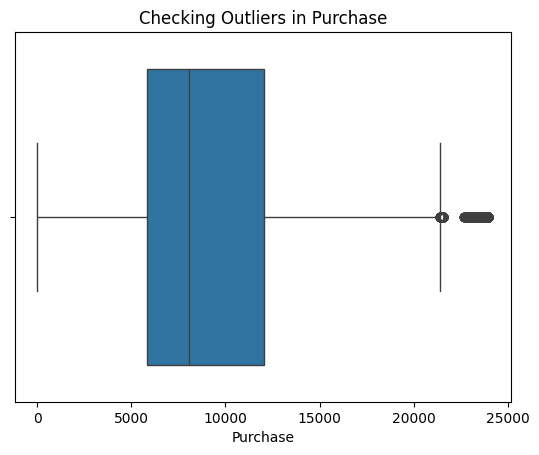

In [ ]:
#Detecting outliers in "Purcahse" column as it is the column which might be prone to outliers
sns.boxplot(x=df_orig["Purchase"])
plt.title("Checking Outliers in Purchase")
plt.show()

### **Obervation:**
There are some outliers in "Purchase" column.

## **Handling outliers**

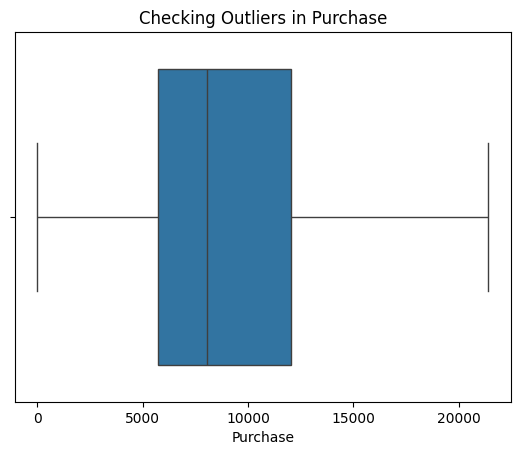

In [ ]:
#Defining Lower and Upper Limit
q1=df_orig["Purchase"].quantile(0.25)
q3=df_orig["Purchase"].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr


#Removing the Outliers
df=df_orig[(df_orig["Purchase"]>lower_limit)&(df_orig["Purchase"]<upper_limit)]


#Verifying Outliers in "Purchase" column of the new dataframe
sns.boxplot(x=df["Purchase"])
plt.title("Checking Outliers in Purchase")
plt.show()



### **Observation:**
After treatment now the dataframe does not have any outliers.

# **3. Data Exploration**

## **General User Profile**

In [ ]:
#Gender
df_gender=df[["User_ID","Gender"]].drop_duplicates()
df_gender["Gender"].value_counts(normalize=True)*100

M    71.719572
F    28.280428
Name: Gender, dtype: float64

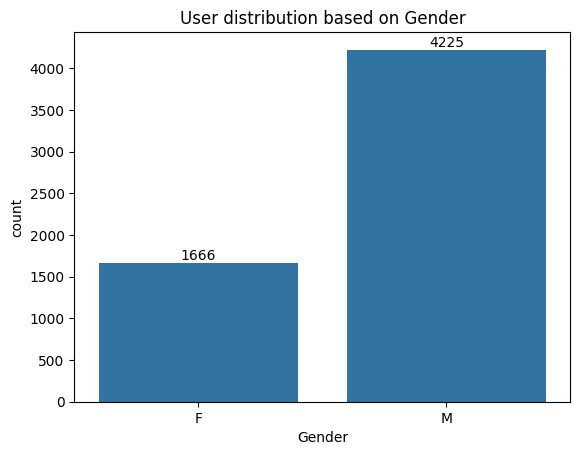

In [ ]:
ax=sns.countplot(x="Gender", data=df_gender)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("User distribution based on Gender")
plt.show()

In [ ]:
#Age
df_Age=df[["User_ID","Age"]].drop_duplicates()
df_Age["Age"].value_counts(normalize=True)*100

26-35    34.849771
36-45    19.809879
18-25    18.146325
46-50     9.013750
51-55     8.164997
55+       6.314717
0-17      3.700560
Name: Age, dtype: float64

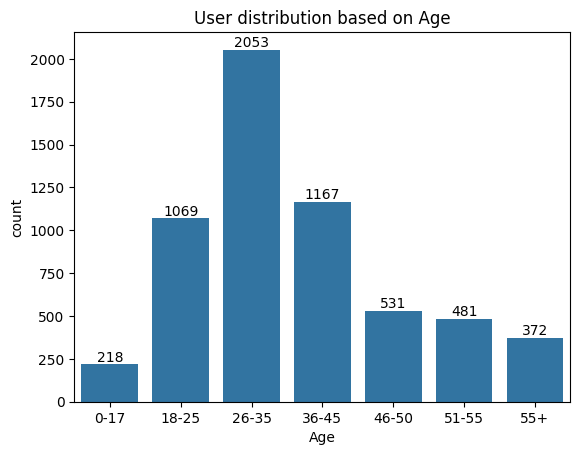

In [ ]:
ax=sns.countplot(x="Age", data=df_Age, order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("User distribution based on Age")
plt.show()

In [ ]:
#Occupation
df_Occupation=df[["User_ID","Occupation"]].drop_duplicates()
df_Occupation["Occupation"].value_counts(normalize=True)*100

4     12.561535
0     11.678832
7     11.356306
1      8.776099
17     8.334748
12     6.382618
14     4.990664
20     4.634188
2      4.345612
16     3.989136
6      3.870311
10     3.259209
3      2.885758
15     2.376507
13     2.376507
11     2.172806
5      1.884230
9      1.493804
19     1.205228
18     1.137328
8      0.288576
Name: Occupation, dtype: float64

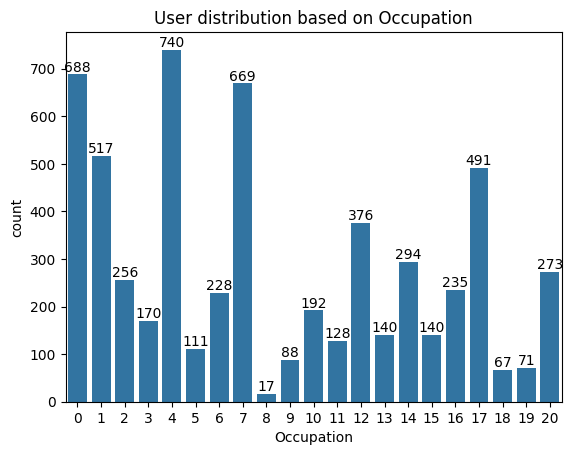

In [ ]:
occu=np.arange(0,21)
ax=sns.countplot(x="Occupation", data=df_Occupation, order=occu)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("User distribution based on Occupation")
plt.show()

In [ ]:
#City_Category
df_City_Category=df[["User_ID","City_Category"]].drop_duplicates()
df_City_Category["City_Category"].value_counts(normalize=True)*100

C    53.284672
B    28.976405
A    17.738924
Name: City_Category, dtype: float64

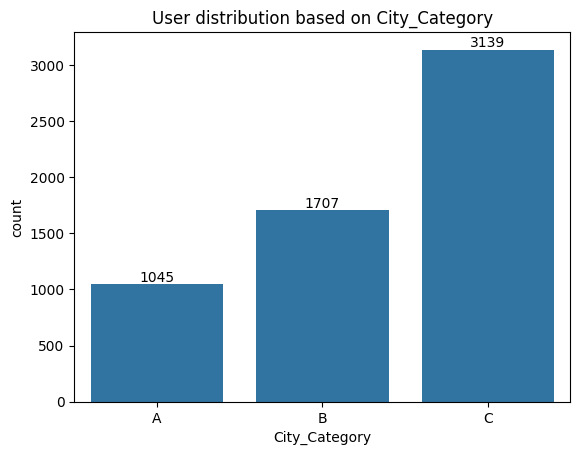

In [ ]:
ax=sns.countplot(x="City_Category", data=df_City_Category, order=["A","B","C"])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("User distribution based on City_Category")
plt.show()

In [ ]:
#Marital_Status
df_Marital_Status=df[["User_ID","Marital_Status"]].drop_duplicates()
df_Marital_Status["Marital_Status"].value_counts(normalize=True)*100

0    58.003735
1    41.996265
Name: Marital_Status, dtype: float64

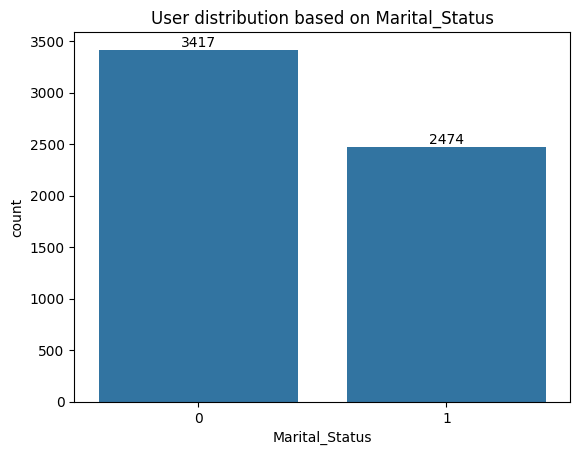

In [ ]:
ax=sns.countplot(x="Marital_Status", data=df_Marital_Status)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("User distribution based on Marital_Status")
plt.show()

### **Observation:**
1.	**71.7%** of Walmart users are **Male** and 28.3% are Female.
2.	Almost **35%** Walmart customers belongs to **“26-35 year”** age group category.
3.	Customers belonging to **0,4 and 7** occupation group are likely to prefer Walmart.
4.	Most of Walmart users belong to **“C”** category citiy.


## **Customer Purchase Behavior**

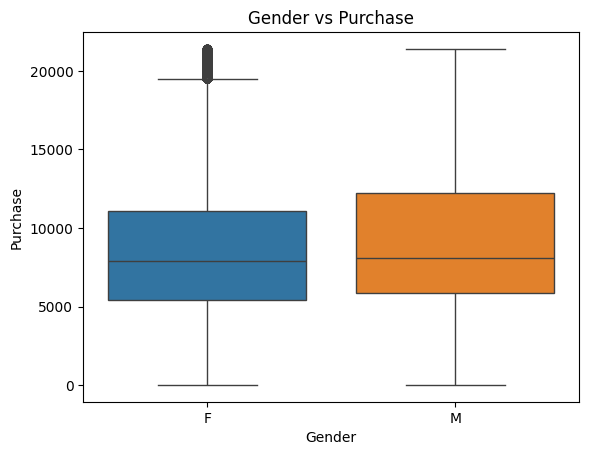

In [ ]:
#Gender
ax=sns.boxplot(x="Gender", y="Purchase", data=df, hue="Gender")
plt.title("Gender vs Purchase")
plt.show()

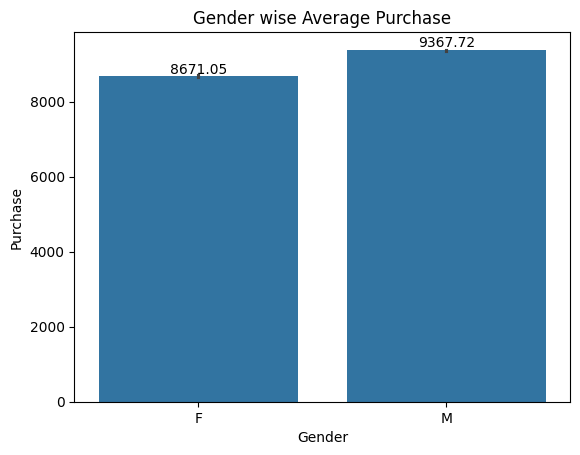

In [ ]:
#Gender
ax=sns.barplot(x="Gender", y="Purchase", data=df,estimator=np.mean)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Gender wise Average Purchase")
plt.show()

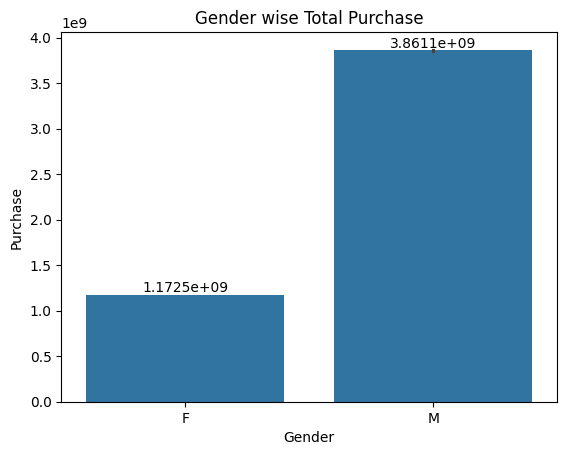

In [ ]:
#Gender
ax=sns.barplot(x="Gender", y="Purchase", data=df,estimator=np.sum)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Gender wise Total Purchase")
plt.show()

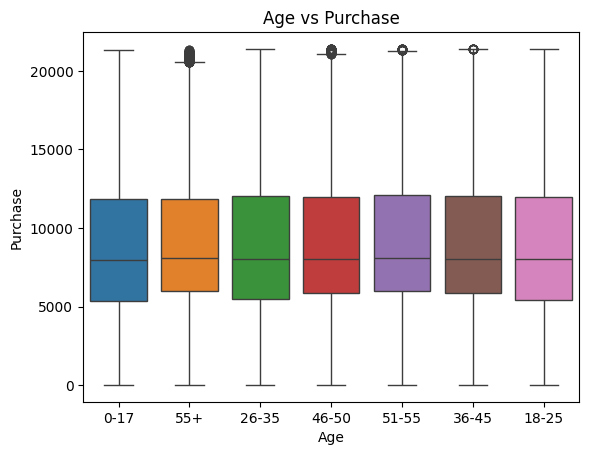

In [ ]:
#Age
ax=sns.boxplot(x="Age", y="Purchase", data=df, hue="Age")
plt.title("Age vs Purchase")
plt.show()

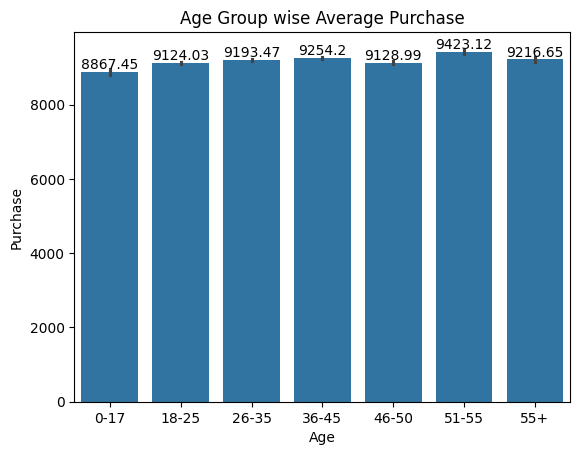

In [ ]:
#Age
ax=sns.barplot(x="Age", y="Purchase", data=df,estimator=np.mean, order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Age Group wise Average Purchase")
plt.show()

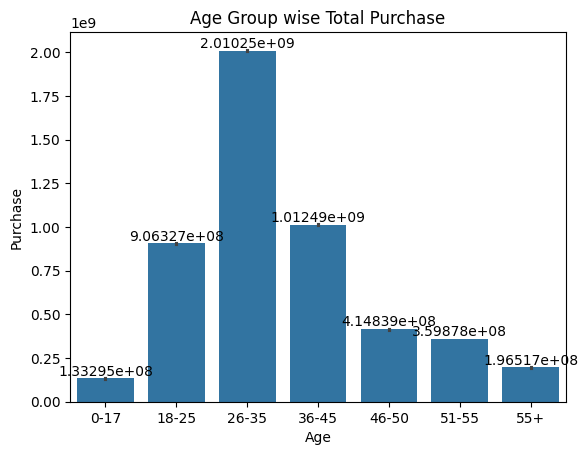

In [ ]:
#Age
ax=sns.barplot(x="Age", y="Purchase", data=df,estimator=np.sum, order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Age Group wise Total Purchase")
plt.show()

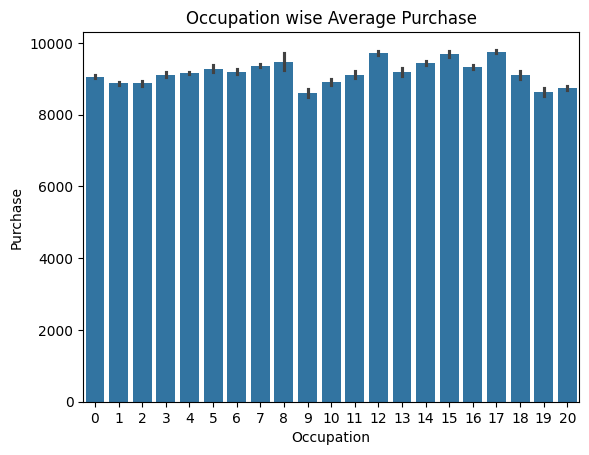

In [ ]:
#Occupation
occu=np.arange(0,21)
ax=sns.barplot(x="Occupation", y="Purchase", data=df,estimator=np.mean, order=occu)
plt.title("Occupation wise Average Purchase")
plt.show()

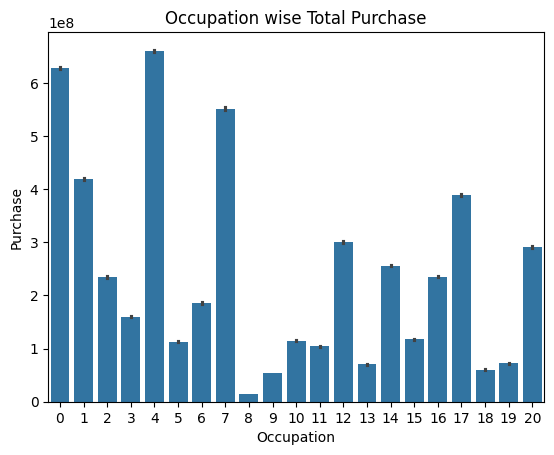

In [ ]:
#Occupation
ax=sns.barplot(x="Occupation", y="Purchase", data=df,estimator=np.sum, order=occu)
plt.title("Occupation wise Total Purchase")
plt.show()

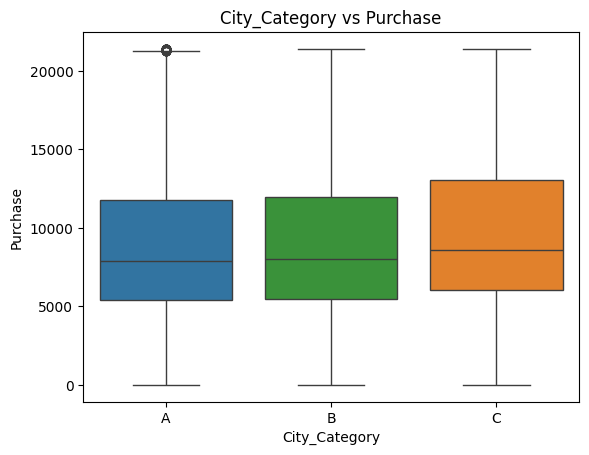

In [ ]:
#City_Category
ax=sns.boxplot(x="City_Category", y="Purchase", data=df, hue="City_Category", order=["A","B","C"])
plt.title("City_Category vs Purchase")
plt.show()

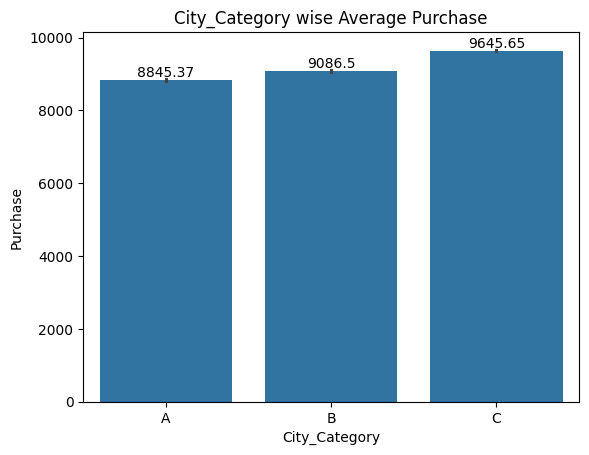

In [ ]:
#City_Category
ax=sns.barplot(x="City_Category", y="Purchase", data=df,estimator=np.mean, order=["A","B","C"])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("City_Category wise Average Purchase")
plt.show()

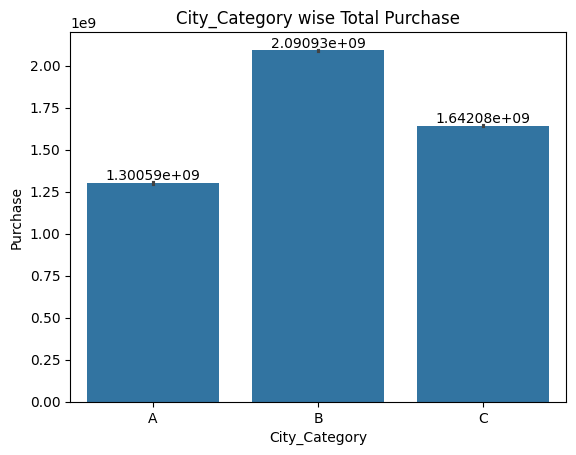

In [ ]:
#City_Category
ax=sns.barplot(x="City_Category", y="Purchase", data=df,estimator=np.sum, order=["A","B","C"])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("City_Category wise Total Purchase")
plt.show()

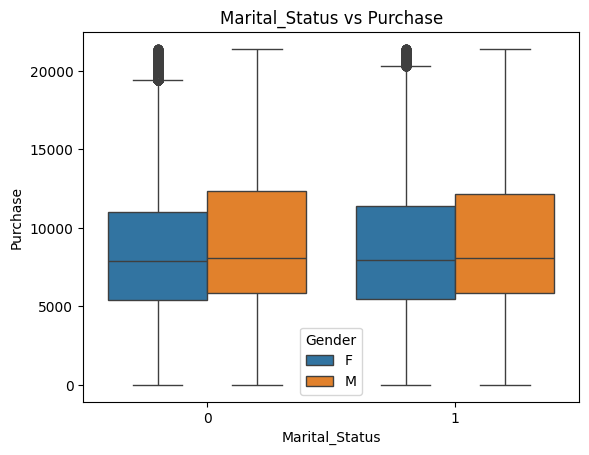

In [ ]:
#Marital_Status
ax=sns.boxplot(x="Marital_Status", y="Purchase", data=df, hue="Gender")
plt.title("Marital_Status vs Purchase")
plt.show()

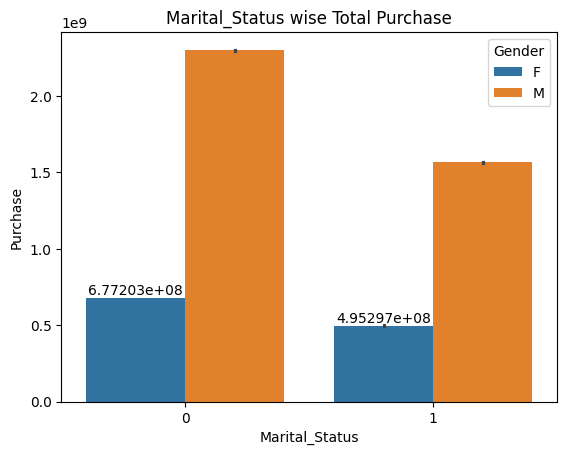

In [ ]:
#Marital_Status
ax=sns.barplot(x="Marital_Status", y="Purchase", data=df,estimator=np.sum, hue="Gender")
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Marital_Status wise Total Purchase")
plt.show()

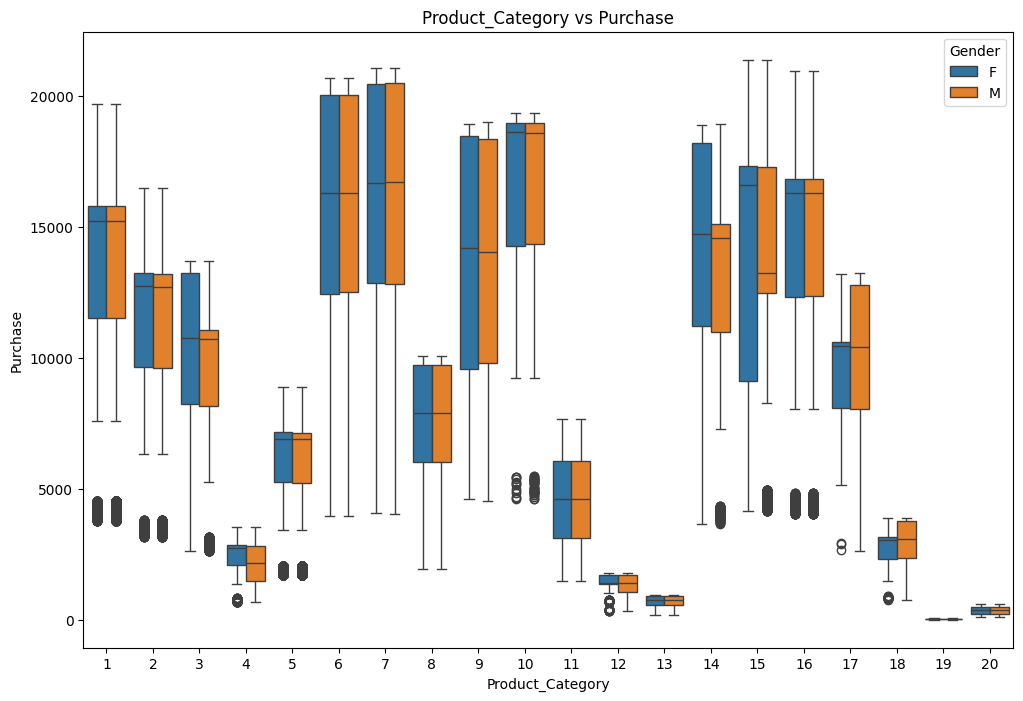

In [ ]:
#Product_Category
plt.figure(figsize=(12,8))
ax=sns.boxplot(x="Product_Category", y="Purchase", data=df, hue="Gender")
plt.title("Product_Category vs Purchase")
plt.show()

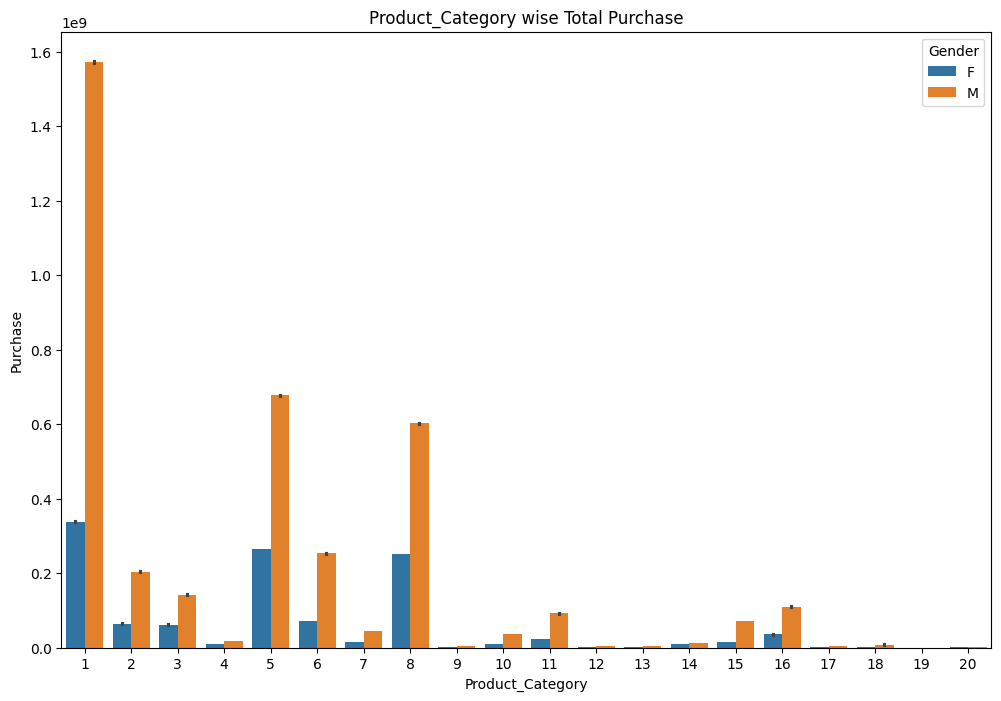

In [ ]:
#Product_Category
plt.figure(figsize=(12,8))
ax=sns.barplot(x="Product_Category", y="Purchase", data=df,estimator=np.sum, hue="Gender")
plt.title("Product_Category wise Total Purchase")
plt.show()

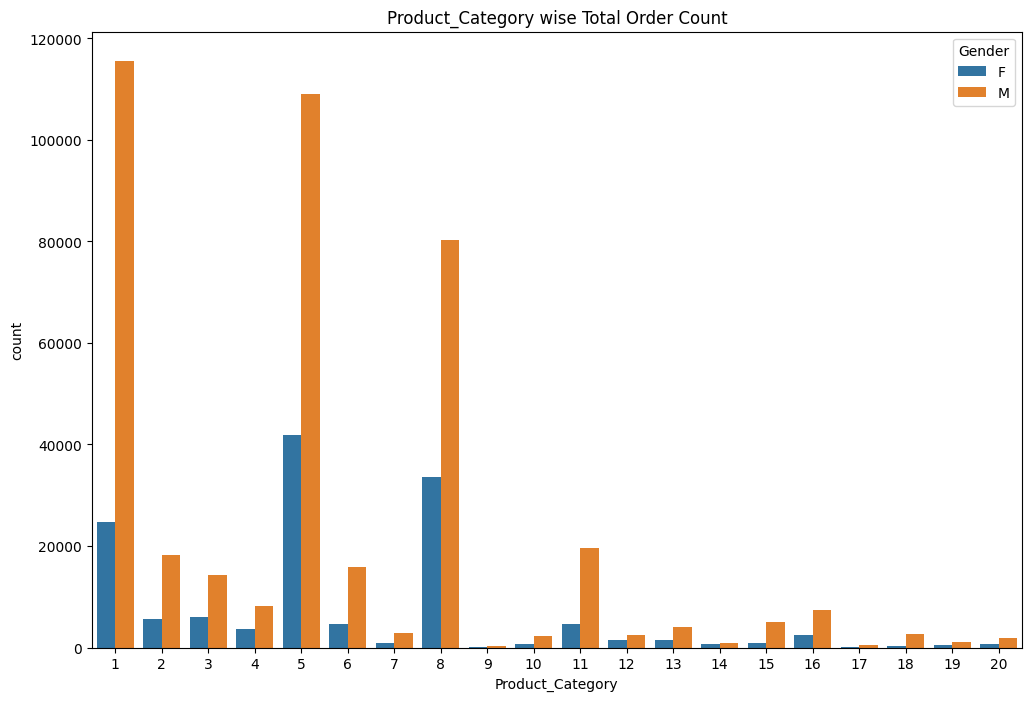

In [ ]:
#Product_Category
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Product_Category", data=df,hue="Gender")
plt.title("Product_Category wise Total Order Count")
plt.show()

### **Observation:**
1.	Most of Walmart’s **revenue** come from the **Male** customers whereas the Average Purchase Amount of Male and Female customers do not have very noticeable difference.
2.	Customers belonging to the **Age Group “26-35”** year are major source of Walmart’s revenue. The Average Purchase Amount across all the Age Groups are almost same.
3.	Customers belonging to the occupation group **0, 4 and 7** Occupation group make most purchase from Walmart.
4.	Total amount wise customer from the city category **“B”** make most purchase from Walmart.
5.	**Single Male** make most purchase from Walmart whereas Married Female make least purchase.
6.	Product category **1,5 and 8** generate most revenue for Walmart.
7.	Product category **5 and 8** are very popular among **Female customers**.


# **Analysis using "Central Limit Theorem (CLT)"**

# **4. How does gender affect the amount spent?**

Lets analyse this using **Central Limit Theorem** and **bootstrapping** and compute the **95% confidence intervals** for the **average amount spent** per gender for different sample sizes - 300, 3000, and 30000.

## **For Female**

In [ ]:
# 95% confidence intervals value of z1 and z2
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
z1,z2

(-1.9599639845400545, 1.959963984540054)

In [ ]:
#Population
female_purchase=df[df["Gender"]=="F"]["Purchase"]

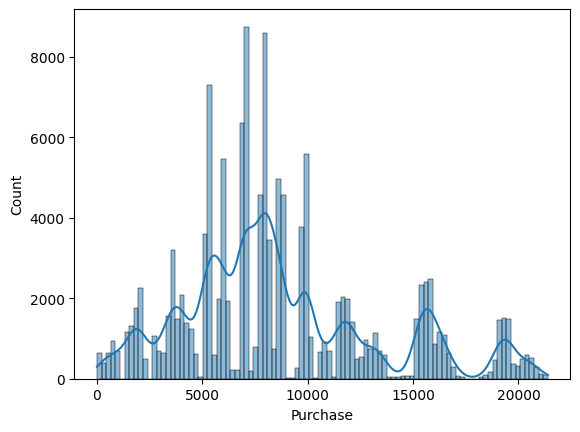

In [ ]:
#Population distribution
sns.histplot(female_purchase,kde=True)
plt.show()

In [ ]:
#population parameters
mu= female_purchase.mean()
print("Population mean: ",mu)
sigma = female_purchase.std()
print("Population standard deviation: ",sigma)

Population mean:  8671.049038603756
Population standard deviation:  4679.058483084379


In [ ]:
#Finding 95% Confidence Interval of entire data using Bootstrapping
n=len(female_purchase)
bootstrapped_means = [np.mean(np.random.choice(female_purchase,size=n)) for i in range(10000)]

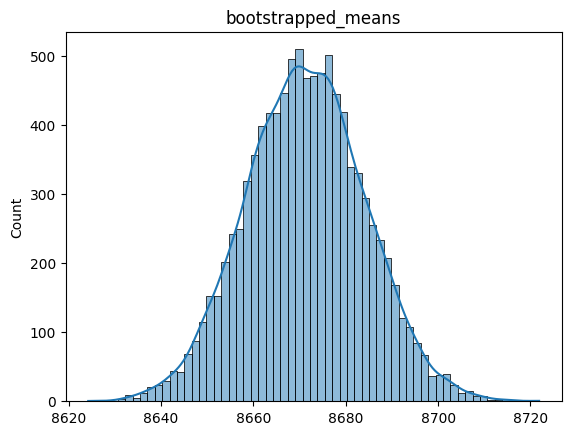

In [ ]:
sns.histplot(bootstrapped_means, kde=True)
plt.title("bootstrapped_means")
plt.show()

In [ ]:
#95% confidence interval
mean_of_bootstrapped_means = np.mean(bootstrapped_means)
#Standard Error
se=np.std(bootstrapped_means)
print("Standard deviation for bootstrapped_means is:", se)
print("95% confidence interval for bootstrapped_means")
print(mean_of_bootstrapped_means+z1*se,mean_of_bootstrapped_means+z2*se)
print("Width of CI: ",((mean_of_bootstrapped_means+z2*se) - (mean_of_bootstrapped_means+z1*se)))

Standard deviation for bootstrapped_means is: 12.82739790056887
95% confidence interval for bootstrapped_means
8646.17888165136 8696.46135745232
Width of CI:  50.28247580095922


In [ ]:
#For sample sizes = 300,
sample_300 = [np.mean(female_purchase.sample(300)) for i in range(10000)]

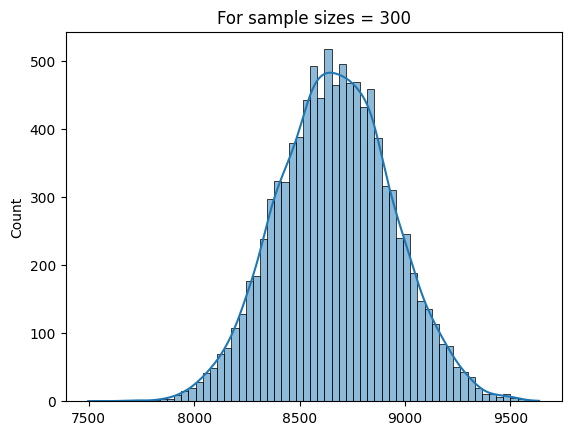

In [ ]:
sns.histplot(sample_300, kde=True)
plt.title("For sample sizes = 300")
plt.show()

In [ ]:
#95% confidence interval
sample_300_mean = np.mean(sample_300)
#Standard Error
se=np.std(sample_300)
print("Standard deviation for Sample means of sample size 300 is:", se)
print("95% confidence interval for sample size 300")
print(sample_300_mean+z1*se,sample_300_mean+z2*se)
print("Width of CI: ",((sample_300_mean+z2*se) - (sample_300_mean+z1*se)))

Standard deviation for Sample means of sample size 300 is: 270.7074055957949
95% confidence interval for sample size 300
8138.928858683965 9200.082389316034
Width of CI:  1061.1535306320693


In [ ]:
#For sample sizes = 3000,
sample_3000 = [np.mean(female_purchase.sample(3000)) for i in range(10000)]

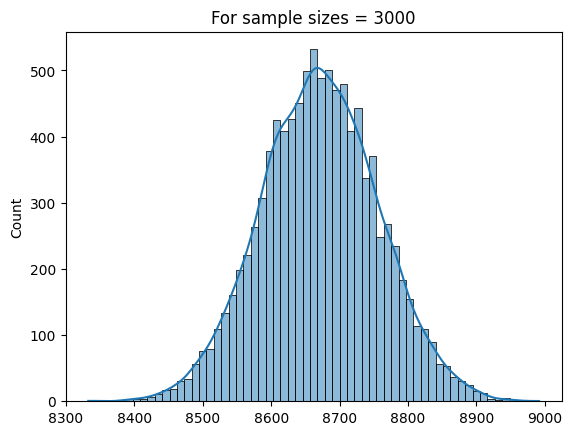

In [ ]:
sns.histplot(sample_3000, kde=True)
plt.title("For sample sizes = 3000")
plt.show()

In [ ]:
#95% confidence interval
sample_3000_mean = np.mean(sample_3000)
#Standard Error
se=np.std(sample_3000)
print("Standard deviation for Sample means of sample size 3000 is:", se)
print("95% confidence interval for sample size 3000")
print(sample_3000_mean+z1*se,sample_3000_mean+z2*se)
print("Width of CI: ",((sample_3000_mean+z2*se) - (sample_3000_mean+z1*se)))

Standard deviation for Sample means of sample size 3000 is: 85.33897392907888
95% confidence interval for sample size 3000
8503.896285254737 8838.418916011931
Width of CI:  334.52263075719384


In [ ]:
#For sample sizes = 30000
sample_30000 = [np.mean(female_purchase.sample(30000)) for i in range(10000)]

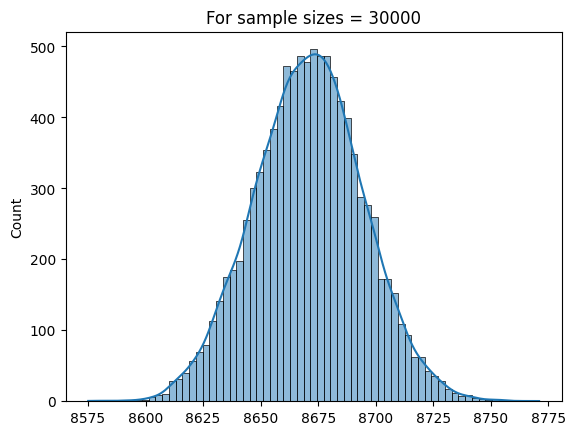

In [ ]:
sns.histplot(sample_30000, kde=True)
plt.title("For sample sizes = 30000")
plt.show()

In [ ]:
#95% confidence interval
sample_30000_mean = np.mean(sample_30000)
#Standard Error
se=np.std(sample_30000)
print("Standard deviation for Sample means of sample size 30000 is:", se)
print("95% confidence interval for sample size 30000")
print(sample_30000_mean+z1*se,sample_30000_mean+z2*se)
print("Width of CI: ",((sample_30000_mean+z2*se) - (sample_30000_mean+z1*se)))

Standard deviation for Sample means of sample size 30000 is: 23.645643691771955
95% confidence interval for sample size 30000
8624.488603099526 8717.177823153805
Width of CI:  92.68922005427885


## **For Male**

In [ ]:
# 95% confidence intervals value of z1 and z2
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
z1,z2

(-1.9599639845400545, 1.959963984540054)

In [ ]:
#Population
male_purchase=df[df["Gender"]=="M"]["Purchase"]

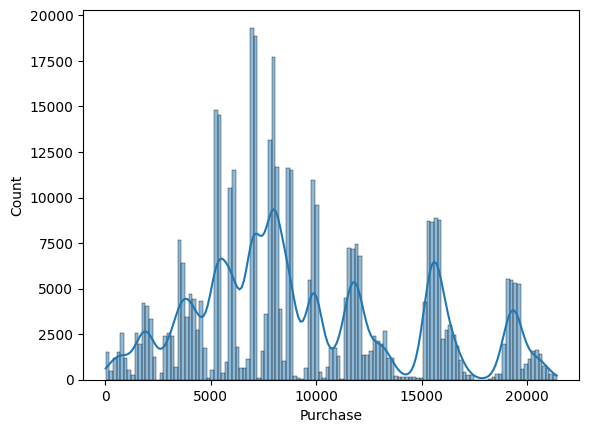

In [ ]:
#Population distribution
sns.histplot(male_purchase,kde=True)
plt.show()

In [ ]:
#population parameters
mu= male_purchase.mean()
print("Population mean: ",mu)
sigma = male_purchase.std()
print("Population standard deviation: ",sigma)

Population mean:  9367.724354697444
Population standard deviation:  5009.234087946682


In [ ]:
#Finding 95% Confidence Interval of entire data using Bootstrapping
n=len(male_purchase)
bootstrapped_means = [np.mean(np.random.choice(male_purchase,size=n)) for i in range(10000)]

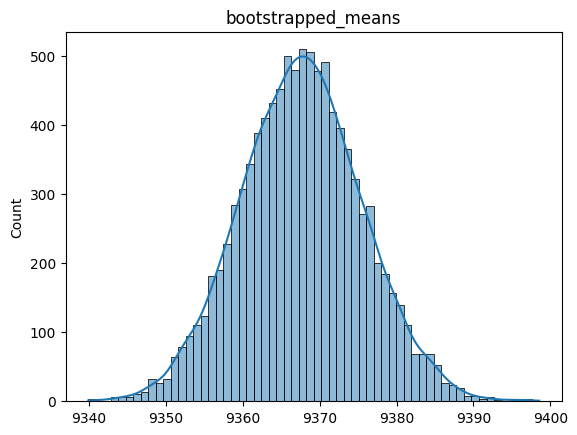

In [ ]:
sns.histplot(bootstrapped_means, kde=True)
plt.title("bootstrapped_means")
plt.show()

In [ ]:
#95% confidence interval
mean_of_bootstrapped_means = np.mean(bootstrapped_means)
#Standard Error
se=np.std(bootstrapped_means)
print("Standard deviation for bootstrapped_means is:", se)
print("95% confidence interval for bootstrapped_means")
print(mean_of_bootstrapped_means+z1*se,mean_of_bootstrapped_means+z2*se)
print("Width of CI: ",((mean_of_bootstrapped_means+z2*se) - (mean_of_bootstrapped_means+z1*se)))

Standard deviation for bootstrapped_means is: 7.8736191288395645
95% confidence interval for bootstrapped_means
9352.22366078461 9383.087680625631
Width of CI:  30.864019841021218


In [ ]:
#For sample sizes = 300,
sample_300 = [np.mean(male_purchase.sample(300)) for i in range(10000)]

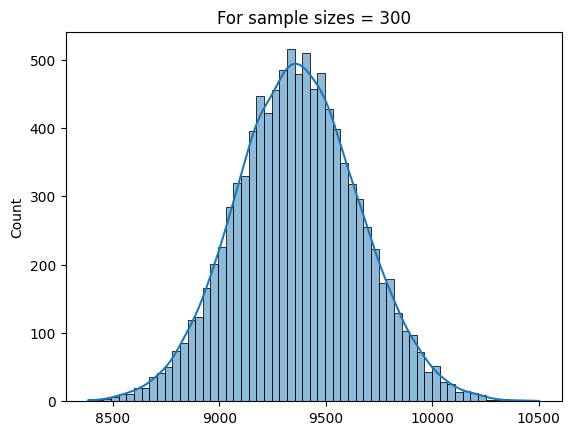

In [ ]:
sns.histplot(sample_300, kde=True)
plt.title("For sample sizes = 300")
plt.show()

In [ ]:
#95% confidence interval
sample_300_mean = np.mean(sample_300)
#Standard Error
se=np.std(sample_300)
print("Standard deviation for Sample means of sample size 300 is:", se)
print("95% confidence interval for sample size 300")
print(sample_300_mean+z1*se,sample_300_mean+z2*se)
print("Width of CI: ",((sample_300_mean+z2*se) - (sample_300_mean+z1*se)))

Standard deviation for Sample means of sample size 300 is: 290.06758820714913
95% confidence interval for sample size 300
8799.70148369826 9936.745535635077
Width of CI:  1137.0440519368167


In [ ]:
#For sample sizes = 3000,
sample_3000 = [np.mean(male_purchase.sample(3000)) for i in range(10000)]

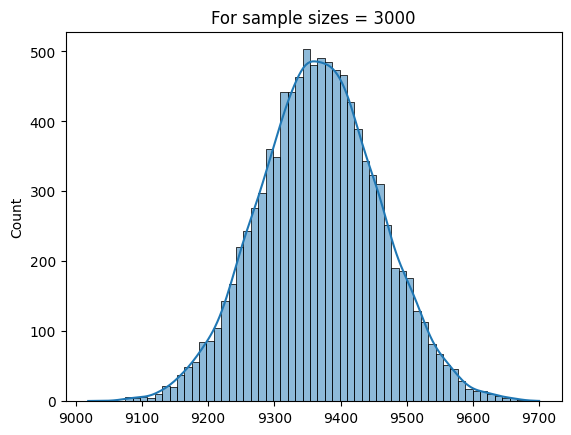

In [ ]:
sns.histplot(sample_3000, kde=True)
plt.title("For sample sizes = 3000")
plt.show()

In [ ]:
#95% confidence interval
sample_3000_mean = np.mean(sample_3000)
#Standard Error
se=np.std(sample_3000)
print("Standard deviation for Sample means of sample size 3000 is:", se)
print("95% confidence interval for sample size 3000")
print(sample_3000_mean+z1*se,sample_3000_mean+z2*se)
print("Width of CI: ",((sample_3000_mean+z2*se) - (sample_3000_mean+z1*se)))

Standard deviation for Sample means of sample size 3000 is: 90.79114558681269
95% confidence interval for sample size 3000
9190.063649768048 9545.95840069862
Width of CI:  355.8947509305726


In [ ]:
#For sample sizes = 30000
sample_30000 = [np.mean(male_purchase.sample(30000)) for i in range(10000)]

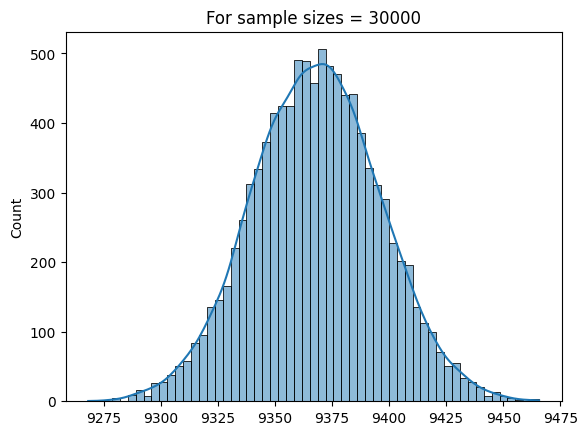

In [ ]:
sns.histplot(sample_30000, kde=True)
plt.title("For sample sizes = 30000")
plt.show()

In [ ]:
#95% confidence interval
sample_30000_mean = np.mean(sample_30000)
#Standard Error
se=np.std(sample_30000)
print("Standard deviation for Sample means of sample size 30000 is:", se)
print("95% confidence interval for sample size 30000")
print(sample_30000_mean+z1*se,sample_30000_mean+z2*se)
print("Width of CI: ",((sample_30000_mean+z2*se) - (sample_30000_mean+z1*se)))

Standard deviation for Sample means of sample size 30000 is: 27.823130434560195
95% confidence interval for sample size 30000
9313.605158167768 9422.669825345565
Width of CI:  109.06466717779767


In [ ]:
print("Male Purchase data sample size: ", len(male_purchase))
print("Female Purchase data sample size: ", len(female_purchase))

Male Purchase data sample size:  412171
Female Purchase data sample size:  135220


## **Observation:**
1.	On an average **Male are more likely to spend** than female customers in Walmart.

2.	**Confidence interval** computed using the entire dataset **wider for Female** than Male,

  Width of Female CI:  50.28247580095922

  Width of Male CI: 30.864019841021218

  This difference is because **Male sample size is more** than Female thus the calculated Confidence Interval is **more precise**. Standard Error is inversely proportional to square root of sample size.

  Male Purchase data sample size:    412171

  Female Purchase data sample size:  135220


3.	As the **Sample Size increases the width of Confidence Interval decreases** indicating we are able to predict the range between which the mean of population will lie with more precision.

  **For Female:**

  Width of CI for sample size 300:    1061.1535306320693

  Width of CI for sample size 3000:   334.52263075719384

  Width of CI for sample size 30000:  92.68922005427885

  **For Male:**

  Width of CI for sample size 300:    1137.0440519368167

  Width of CI for sample size 3000:   355.8947509305726

  Width of CI for sample size 30000:  109.06466717779767

4.	**Confidence intervals (CI)** for different sample sizes **does overlap** with each other. With increasing sample size, the spread of CI become narrower. It is like CI of higher sample size lies with the CI of smaller sample size making the prediction of actual population mean more precise.

  **For Female:**

  CI for sample size 300:     (8138.928858683965, 9200.082389316034)

  CI for sample size 3000:   (8503.896285254737, 8838.418916011931)

  CI for sample size 30000:  (8624.488603099526 8717.177823153805)

  **For Male:**

  CI for sample size 300:     (8799.70148369826, 9936.745535635077)

  CI for sample size 3000:   (9190.063649768048, 9545.95840069862)

  CI for sample size 30000:  (9313.605158167768, 9422.669825345565)

5.	With **increasing sample size**, the **shape of the distributions** of the means becomes **narrower** i.e. its **spread reduces**. This reduction in spread is captured by the reduction in distribution's standard deviation.

  **For Female:**

  Standard deviation for Sample means of sample size 300 is: 270.7074055957949

  Standard deviation for Sample means of sample size 3000 is: 85.33897392907888

  Standard deviation for Sample means of sample size 30000 is: 23.645643691771955

  **For Male:**

  Standard deviation for Sample means of sample size 300 is: 290.06758820714913

  Standard deviation for Sample means of sample size 3000 is: 90.79114558681269

  Standard deviation for Sample means of sample size 30000 is: 27.823130434560195


# **5. How does Marital_Status affect the amount spent?**

Lets analyse this using **Central Limit Theorem** and **bootstrapping** and compute the **95% confidence intervals** for the **average amount spent** per gender for different sample sizes - 300, 3000, and 30000.

## **For Unmarried (Marital_Status = 0)**

In [ ]:
#Number data points for Married and Unmarried
df["Marital_Status"].value_counts()


0    323242
1    224149
Name: Marital_Status, dtype: int64

In [ ]:
# 95% confidence intervals value of z1 and z2
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
z1,z2

(-1.9599639845400545, 1.959963984540054)

In [ ]:
#Population
unmarried_purchase=df[df["Marital_Status"]==0]["Purchase"]

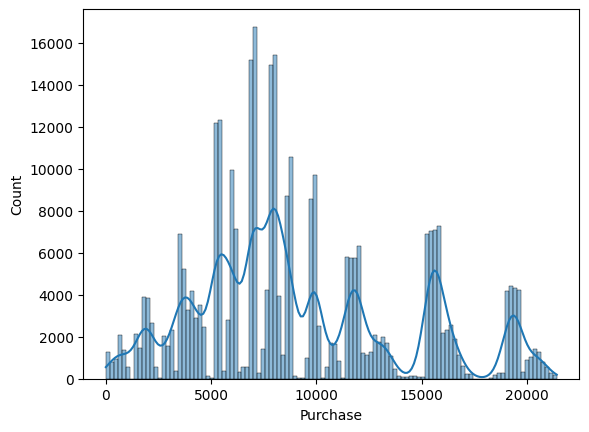

In [ ]:
#Population distribution
sns.histplot(unmarried_purchase,kde=True)
plt.show()

In [ ]:
#population parameters
mu= unmarried_purchase.mean()
print("Population mean: ",mu)
sigma = unmarried_purchase.std()
print("Population standard deviation: ",sigma)

Population mean:  9201.581848893398
Population standard deviation:  4948.327397459


In [ ]:
#Finding 95% Confidence Interval of entire data using Bootstrapping
n=len(unmarried_purchase)
bootstrapped_means = [np.mean(np.random.choice(unmarried_purchase,size=n)) for i in range(10000)]

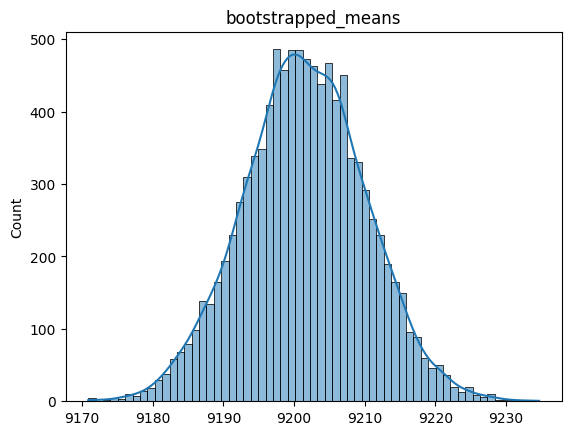

In [ ]:
sns.histplot(bootstrapped_means, kde=True)
plt.title("bootstrapped_means")
plt.show()

In [ ]:
#95% confidence interval
mean_of_bootstrapped_means = np.mean(bootstrapped_means)
#Standard Error
se=np.std(bootstrapped_means)
print("Standard deviation for bootstrapped_means is:", se)
print("95% confidence interval for bootstrapped_means")
print(mean_of_bootstrapped_means+z1*se,mean_of_bootstrapped_means+z2*se)
print("Width of CI: ",((mean_of_bootstrapped_means+z2*se) - (mean_of_bootstrapped_means+z1*se)))

Standard deviation for bootstrapped_means is: 8.646178266273518
95% confidence interval for bootstrapped_means
9184.552634167298 9218.445030178917
Width of CI:  33.892396011618985


In [ ]:
#For sample sizes = 300,
sample_300 = [np.mean(unmarried_purchase.sample(300)) for i in range(10000)]

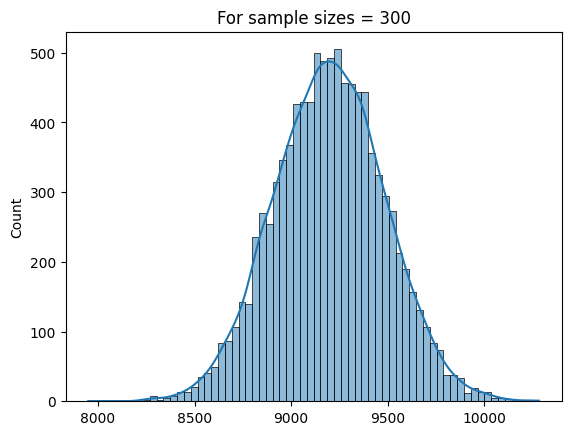

In [ ]:
sns.histplot(sample_300, kde=True)
plt.title("For sample sizes = 300")
plt.show()

In [ ]:
#95% confidence interval
sample_300_mean = np.mean(sample_300)
#Standard Error
se=np.std(sample_300)
print("Standard deviation for Sample means of sample size 300 is:", se)
print("95% confidence interval for sample size 300")
print(sample_300_mean+z1*se,sample_300_mean+z2*se)
print("Width of CI: ",((sample_300_mean+z2*se) - (sample_300_mean+z1*se)))

Standard deviation for Sample means of sample size 300 is: 284.8518120810761
95% confidence interval for sample size 300
8640.898513056785 9757.497098276548
Width of CI:  1116.5985852197628


In [ ]:
#For sample sizes = 3000,
sample_3000 = [np.mean(unmarried_purchase.sample(3000)) for i in range(10000)]

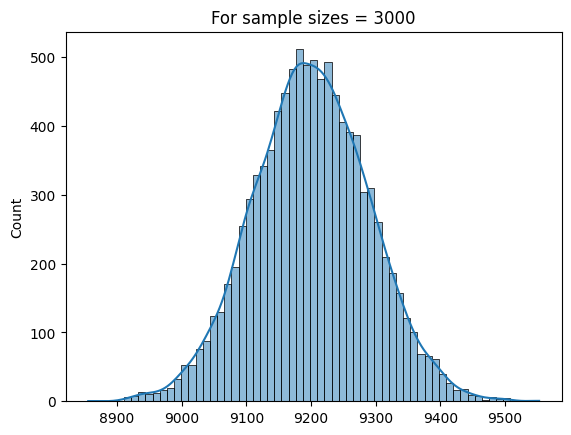

In [ ]:
sns.histplot(sample_3000, kde=True)
plt.title("For sample sizes = 3000")
plt.show()

In [ ]:
#95% confidence interval
sample_3000_mean = np.mean(sample_3000)
#Standard Error
se=np.std(sample_3000)
print("Standard deviation for Sample means of sample size 3000 is:", se)
print("95% confidence interval for sample size 3000")
print(sample_3000_mean+z1*se,sample_3000_mean+z2*se)
print("Width of CI: ",((sample_3000_mean+z2*se) - (sample_3000_mean+z1*se)))

Standard deviation for Sample means of sample size 3000 is: 89.30139214640539
95% confidence interval for sample size 3000
9025.394839023758 9375.449863776243
Width of CI:  350.0550247524843


In [ ]:
#For sample sizes = 30000
sample_30000 = [np.mean(unmarried_purchase.sample(30000)) for i in range(10000)]

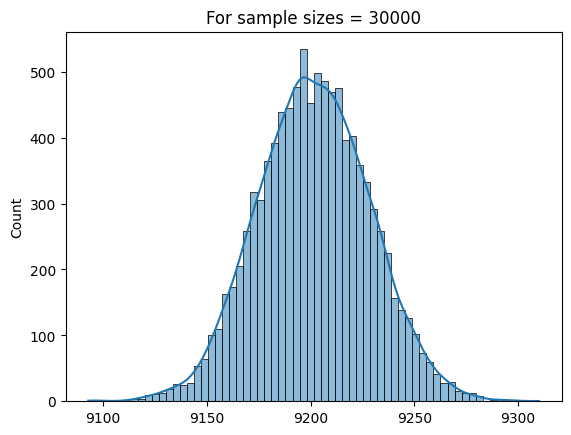

In [ ]:
sns.histplot(sample_30000, kde=True)
plt.title("For sample sizes = 30000")
plt.show()

In [ ]:
#95% confidence interval
sample_30000_mean = np.mean(sample_30000)
#Standard Error
se=np.std(sample_30000)
print("Standard deviation for Sample means of sample size 30000 is:", se)
print("95% confidence interval for sample size 30000")
print(sample_30000_mean+z1*se,sample_30000_mean+z2*se)
print("Width of CI: ",((sample_30000_mean+z2*se) - (sample_30000_mean+z1*se)))

Standard deviation for Sample means of sample size 30000 is: 26.894535357920592
95% confidence interval for sample size 30000
9148.85582687087 9254.280468235796
Width of CI:  105.42464136492708


## **For Married (Marital_Status = 1)**

In [ ]:
# 95% confidence intervals value of z1 and z2
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
z1,z2

(-1.9599639845400545, 1.959963984540054)

In [ ]:
#Population
married_purchase=df[df["Marital_Status"]==1]["Purchase"]

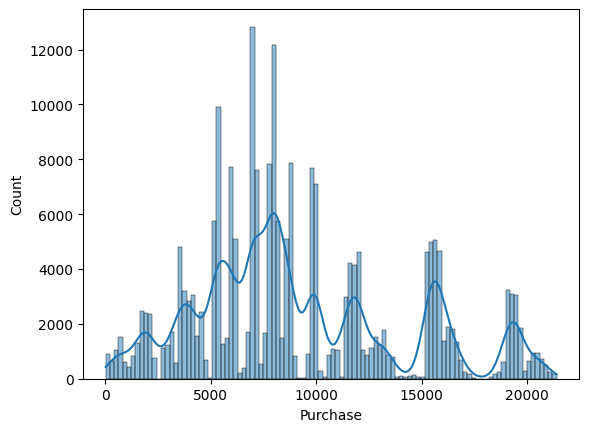

In [ ]:
#Population distribution
sns.histplot(married_purchase,kde=True)
plt.show()

In [ ]:
#population parameters
mu= married_purchase.mean()
print("Population mean: ",mu)
sigma = married_purchase.std()
print("Population standard deviation: ",sigma)

Population mean:  9187.040076020861
Population standard deviation:  4925.2052318513715


In [ ]:
#Finding 95% Confidence Interval of entire data using Bootstrapping
n=len(married_purchase)
bootstrapped_means = [np.mean(np.random.choice(married_purchase,size=n)) for i in range(10000)]

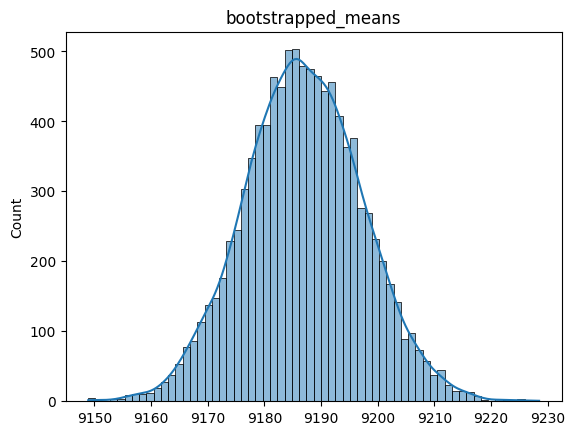

In [ ]:
sns.histplot(bootstrapped_means, kde=True)
plt.title("bootstrapped_means")
plt.show()

In [ ]:
#95% confidence interval
mean_of_bootstrapped_means = np.mean(bootstrapped_means)
#Standard Error
se=np.std(bootstrapped_means)
print("Standard deviation for bootstrapped_means is:", se)
print("95% confidence interval for bootstrapped_means")
print(mean_of_bootstrapped_means+z1*se,mean_of_bootstrapped_means+z2*se)
print("Width of CI: ",((mean_of_bootstrapped_means+z2*se) - (mean_of_bootstrapped_means+z1*se)))

Standard deviation for bootstrapped_means is: 10.389262522026106
95% confidence interval for bootstrapped_means
9166.512974407407 9207.238135145613
Width of CI:  40.725160738205886


In [ ]:
#For sample sizes = 300,
sample_300 = [np.mean(married_purchase.sample(300)) for i in range(10000)]

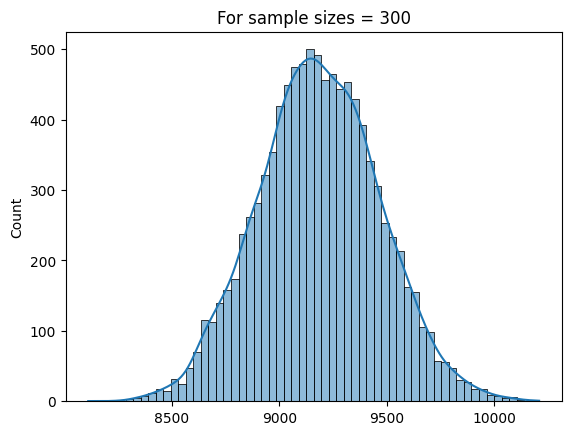

In [ ]:
sns.histplot(sample_300, kde=True)
plt.title("For sample sizes = 300")
plt.show()

In [ ]:
#95% confidence interval
sample_300_mean = np.mean(sample_300)
#Standard Error
se=np.std(sample_300)
print("Standard deviation for Sample means of sample size 300 is:", se)
print("95% confidence interval for sample size 300")
print(sample_300_mean+z1*se,sample_300_mean+z2*se)
print("Width of CI: ",((sample_300_mean+z2*se) - (sample_300_mean+z1*se)))

Standard deviation for Sample means of sample size 300 is: 282.1938251473857
95% confidence interval for sample size 300
8630.985271051532 9737.16473894847
Width of CI:  1106.1794678969381


In [ ]:
#For sample sizes = 3000,
sample_3000 = [np.mean(married_purchase.sample(3000)) for i in range(10000)]

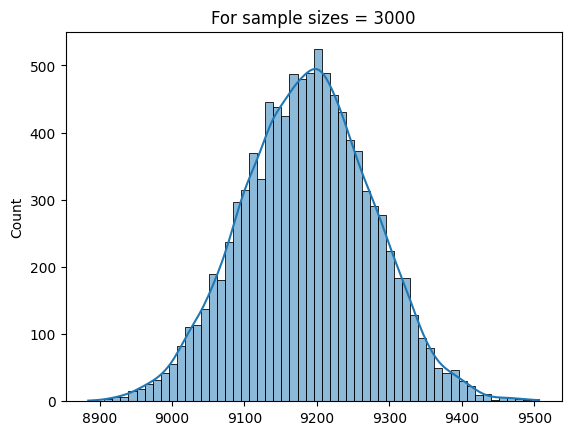

In [ ]:
sns.histplot(sample_3000, kde=True)
plt.title("For sample sizes = 3000")
plt.show()

In [ ]:
#95% confidence interval
sample_3000_mean = np.mean(sample_3000)
#Standard Error
se=np.std(sample_3000)
print("Standard deviation for Sample means of sample size 3000 is:", se)
print("95% confidence interval for sample size 3000")
print(sample_3000_mean+z1*se,sample_3000_mean+z2*se)
print("Width of CI: ",((sample_3000_mean+z2*se) - (sample_3000_mean+z1*se)))

Standard deviation for Sample means of sample size 3000 is: 89.31457166952421
95% confidence interval for sample size 3000
9011.971739766446 9362.078427300225
Width of CI:  350.1066875337783


In [ ]:
#For sample sizes = 30000
sample_30000 = [np.mean(married_purchase.sample(30000)) for i in range(10000)]

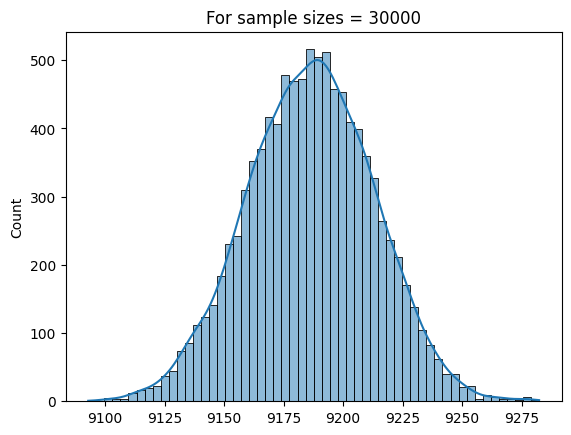

In [ ]:
sns.histplot(sample_30000, kde=True)
plt.title("For sample sizes = 30000")
plt.show()

In [ ]:
#95% confidence interval
sample_30000_mean = np.mean(sample_30000)
#Standard Error
se=np.std(sample_30000)
print("Standard deviation for Sample means of sample size 30000 is:", se)
print("95% confidence interval for sample size 30000")
print(sample_30000_mean+z1*se,sample_30000_mean+z2*se)
print("Width of CI: ",((sample_30000_mean+z2*se) - (sample_30000_mean+z1*se)))

Standard deviation for Sample means of sample size 30000 is: 26.50279978294561
95% confidence interval for sample size 30000
9134.44780532595 9238.33687145405
Width of CI:  103.88906612810024


## **Observation:**
1.	On an average Marital Status of a customer **does not appear to have much effect** on amount of money spent by the customer at Walmart.

2.	**Confidence interval** computed using the entire dataset **wider for Married** than Unmarried customers,

  Width of Unmarried CI:  33.892396011618985

  Width of Married CI: 40.725160738205886

  This difference is because **Ummarried sample size is more** than Married thus the calculated Confidence Interval is **more precise**. Standard Error is inversely proportional to square root of sample size.

  Unmarried Purchase data sample size:    323242

  Married Purchase data sample size:  224149


3.	As the **Sample Size increases the width of Confidence Interval decreases** indicating we are able to predict the range between which the mean of population will lie with more precision.

  **For Unmarried:**

  Width of CI for sample size 300:    1116.5985852197628

  Width of CI for sample size 3000:   350.0550247524843

  Width of CI for sample size 30000:  105.42464136492708

  **For Married:**

  Width of CI for sample size 300:    1106.1794678969381

  Width of CI for sample size 3000:   350.1066875337783

  Width of CI for sample size 30000:  103.88906612810024

4.	**Confidence intervals (CI)** for different sample sizes **does overlap** with each other. With increasing sample size, the spread of CI become narrower. It is like CI of higher sample size lies with the CI of smaller sample size making the prediction of actual population mean more precise.

  **For Unmarried:**

  CI for sample size 300:     (8640.898513056785, 9757.497098276548)

  CI for sample size 3000:   (9025.394839023758, 9375.449863776243)

  CI for sample size 30000:  (9148.85582687087, 9254.280468235796)

  **For Married:**

  CI for sample size 300:     (8630.985271051532, 9737.16473894847)

  CI for sample size 3000:   (9011.971739766446, 9362.078427300225)

  CI for sample size 30000:  (9134.44780532595, 9238.33687145405)

5.	With **increasing sample size**, the **shape of the distributions** of the means becomes **narrower** i.e. its **spread reduces**. This reduction in spread is captured by the reduction in distribution's standard deviation.

  **For Unmarried:**

  Standard deviation for Sample means of sample size 300 is: 284.8518120810761

  Standard deviation for Sample means of sample size 3000 is: 89.30139214640539

  Standard deviation for Sample means of sample size 30000 is: 26.894535357920592

  **For Married:**

  Standard deviation for Sample means of sample size 300 is: 282.1938251473857

  Standard deviation for Sample means of sample size 3000 is: 89.31457166952421

  Standard deviation for Sample means of sample size 30000 is: 26.50279978294561


# **6. How does Age affect the amount spent?**

In [ ]:
#Number data points within different Age Group
df["Age"].value_counts()

26-35    218661
36-45    109409
18-25     99334
46-50     45442
51-55     38191
55+       21322
0-17      15032
Name: Age, dtype: int64

Lets analyse this using **Central Limit Theorem** and **bootstrapping** and compute the **95% confidence intervals** for the **average amount spent** per gender for different sample sizes - 300, 3000, and 30000.

For analyis using CLT and diffrent sample size lets select **top 2 Age groups**:

**26-35**

**36-45**

## **For Age Group 26-35**

In [ ]:
# 95% confidence intervals value of z1 and z2
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
z1,z2

(-1.9599639845400545, 1.959963984540054)

In [ ]:
#Population
age_26_35_purchase=df[df["Age"]=="26-35"]["Purchase"]

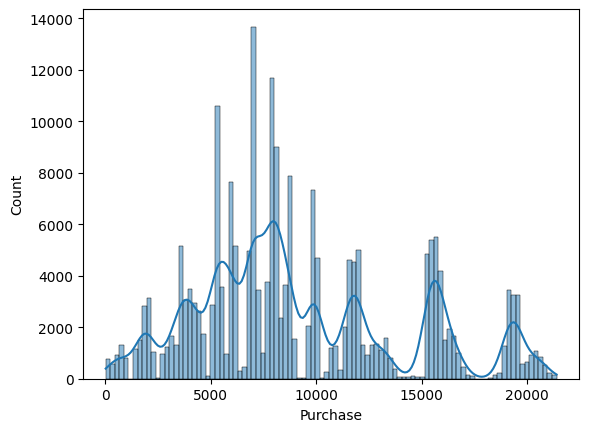

In [ ]:
#Population distribution
sns.histplot(age_26_35_purchase,kde=True)
plt.show()

In [ ]:
#population parameters
mu= age_26_35_purchase.mean()
print("Population mean: ",mu)
sigma = age_26_35_purchase.std()
print("Population standard deviation: ",sigma)

Population mean:  9193.469923763269
Population standard deviation:  4937.410901301763


In [ ]:
#Finding 95% Confidence Interval of entire data using Bootstrapping
n=len(age_26_35_purchase)
bootstrapped_means = [np.mean(np.random.choice(age_26_35_purchase,size=n)) for i in range(10000)]

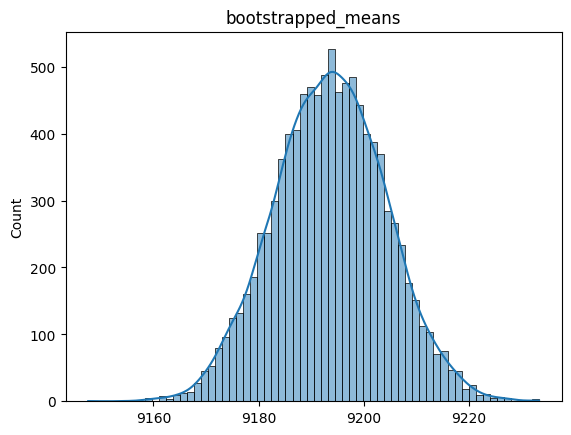

In [ ]:
sns.histplot(bootstrapped_means, kde=True)
plt.title("bootstrapped_means")
plt.show()

In [ ]:
#95% confidence interval
mean_of_bootstrapped_means = np.mean(bootstrapped_means)
#Standard Error
se=np.std(bootstrapped_means)
print("Standard deviation for bootstrapped_means is:", se)
print("95% confidence interval for bootstrapped_means")
print(mean_of_bootstrapped_means+z1*se,mean_of_bootstrapped_means+z2*se)
print("Width of CI: ",((mean_of_bootstrapped_means+z2*se) - (mean_of_bootstrapped_means+z1*se)))

Standard deviation for bootstrapped_means is: 10.610148367408048
95% confidence interval for bootstrapped_means
9172.840333295584 9214.431350637076
Width of CI:  41.59101734149226


In [ ]:
#For sample sizes = 300,
sample_300 = [np.mean(age_26_35_purchase.sample(300)) for i in range(10000)]

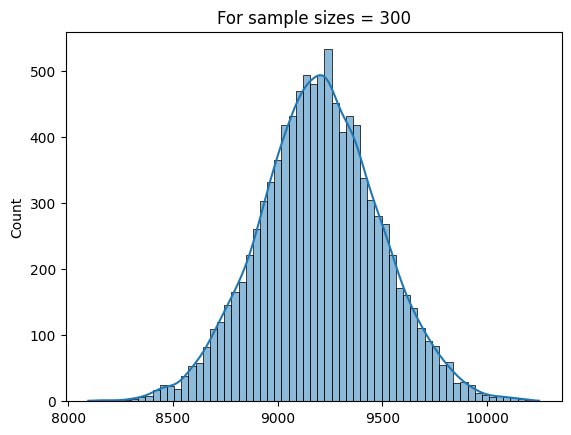

In [ ]:
sns.histplot(sample_300, kde=True)
plt.title("For sample sizes = 300")
plt.show()

In [ ]:
#95% confidence interval
sample_300_mean = np.mean(sample_300)
#Standard Error
se=np.std(sample_300)
print("Standard deviation for Sample means of sample size 300 is:", se)
print("95% confidence interval for sample size 300")
print(sample_300_mean+z1*se,sample_300_mean+z2*se)
print("Width of CI: ",((sample_300_mean+z2*se) - (sample_300_mean+z1*se)))

Standard deviation for Sample means of sample size 300 is: 286.8814464837962
95% confidence interval for sample size 300
8638.519345059003 9763.073950940994
Width of CI:  1124.554605881991


In [ ]:
#For sample sizes = 3000,
sample_3000 = [np.mean(age_26_35_purchase.sample(3000)) for i in range(10000)]

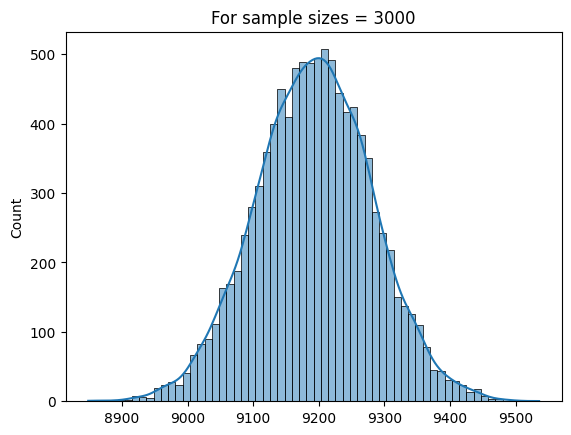

In [ ]:
sns.histplot(sample_3000, kde=True)
plt.title("For sample sizes = 3000")
plt.show()

In [ ]:
#95% confidence interval
sample_3000_mean = np.mean(sample_3000)
#Standard Error
se=np.std(sample_3000)
print("Standard deviation for Sample means of sample size 3000 is:", se)
print("95% confidence interval for sample size 3000")
print(sample_3000_mean+z1*se,sample_3000_mean+z2*se)
print("Width of CI: ",((sample_3000_mean+z2*se) - (sample_3000_mean+z1*se)))

Standard deviation for Sample means of sample size 3000 is: 88.56039211935956
95% confidence interval for sample size 3000
9019.291090989313 9366.441449010692
Width of CI:  347.15035802137936


In [ ]:
#For sample sizes = 30000
sample_30000 = [np.mean(age_26_35_purchase.sample(30000)) for i in range(10000)]

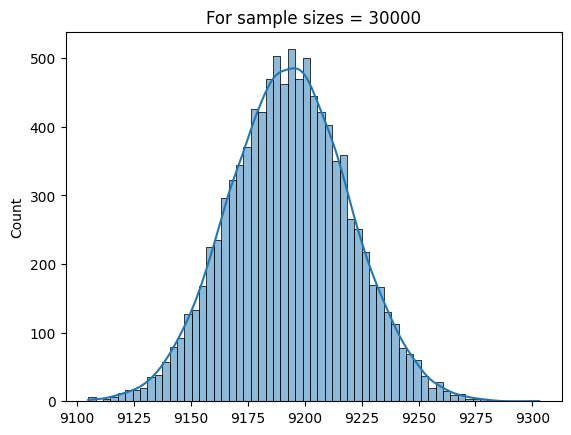

In [ ]:
sns.histplot(sample_30000, kde=True)
plt.title("For sample sizes = 30000")
plt.show()

In [ ]:
#95% confidence interval
sample_30000_mean = np.mean(sample_30000)
#Standard Error
se=np.std(sample_30000)
print("Standard deviation for Sample means of sample size 30000 is:", se)
print("95% confidence interval for sample size 30000")
print(sample_30000_mean+z1*se,sample_30000_mean+z2*se)
print("Width of CI: ",((sample_30000_mean+z2*se) - (sample_30000_mean+z1*se)))

Standard deviation for Sample means of sample size 30000 is: 26.206222384456257
95% confidence interval for sample size 30000
9141.84311242895 9244.569616517714
Width of CI:  102.72650408876507


## **For Age Group 36-45**

In [ ]:
# 95% confidence intervals value of z1 and z2
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
z1,z2

(-1.9599639845400545, 1.959963984540054)

In [ ]:
#Population
age_36_45_purchase=df[df["Age"]=="36-45"]["Purchase"]

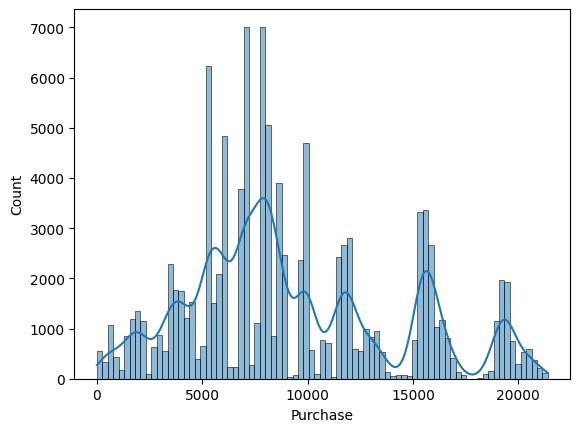

In [ ]:
#Population distribution
sns.histplot(age_36_45_purchase,kde=True)
plt.show()

In [ ]:
#population parameters
mu= age_36_45_purchase.mean()
print("Population mean: ",mu)
sigma = age_36_45_purchase.std()
print("Population standard deviation: ",sigma)

Population mean:  9254.202213711851
Population standard deviation:  4927.744433264267


In [ ]:
#Finding 95% Confidence Interval of entire data using Bootstrapping
n=len(age_36_45_purchase)
bootstrapped_means = [np.mean(np.random.choice(age_36_45_purchase,size=n)) for i in range(10000)]

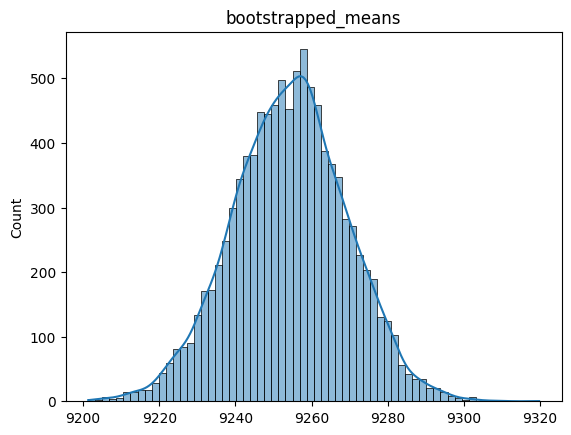

In [ ]:
sns.histplot(bootstrapped_means, kde=True)
plt.title("bootstrapped_means")
plt.show()

In [ ]:
#95% confidence interval
mean_of_bootstrapped_means = np.mean(bootstrapped_means)
#Standard Error
se=np.std(bootstrapped_means)
print("Standard deviation for bootstrapped_means is:", se)
print("95% confidence interval for bootstrapped_means")
print(mean_of_bootstrapped_means+z1*se,mean_of_bootstrapped_means+z2*se)
print("Width of CI: ",((mean_of_bootstrapped_means+z2*se) - (mean_of_bootstrapped_means+z1*se)))

Standard deviation for bootstrapped_means is: 14.97111037827422
95% confidence interval for bootstrapped_means
9224.921260431558 9283.606934731542
Width of CI:  58.685674299984385


In [ ]:
#For sample sizes = 300,
sample_300 = [np.mean(age_36_45_purchase.sample(300)) for i in range(10000)]

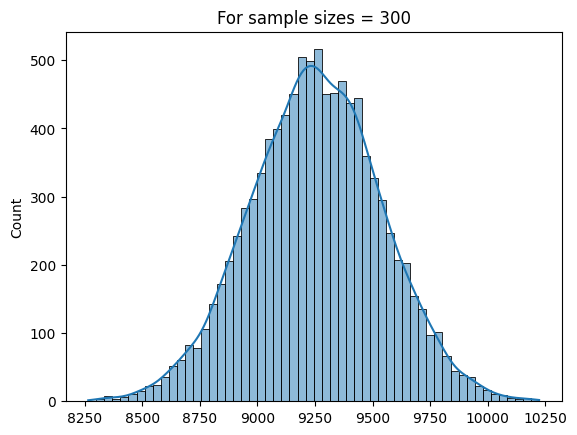

In [ ]:
sns.histplot(sample_300, kde=True)
plt.title("For sample sizes = 300")
plt.show()

In [ ]:
#95% confidence interval
sample_300_mean = np.mean(sample_300)
#Standard Error
se=np.std(sample_300)
print("Standard deviation for Sample means of sample size 300 is:", se)
print("95% confidence interval for sample size 300")
print(sample_300_mean+z1*se,sample_300_mean+z2*se)
print("Width of CI: ",((sample_300_mean+z2*se) - (sample_300_mean+z1*se)))

Standard deviation for Sample means of sample size 300 is: 284.8181999215697
95% confidence interval for sample size 300
8696.159785678861 9812.626613654473
Width of CI:  1116.4668279756115


In [ ]:
#For sample sizes = 3000,
sample_3000 = [np.mean(age_36_45_purchase.sample(3000)) for i in range(10000)]

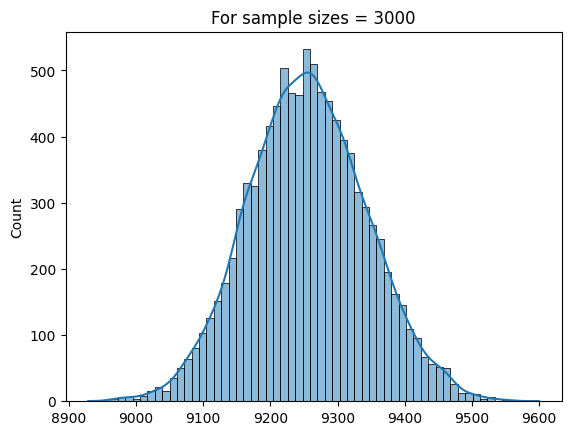

In [ ]:
sns.histplot(sample_3000, kde=True)
plt.title("For sample sizes = 3000")
plt.show()

In [ ]:
#95% confidence interval
sample_3000_mean = np.mean(sample_3000)
#Standard Error
se=np.std(sample_3000)
print("Standard deviation for Sample means of sample size 3000 is:", se)
print("95% confidence interval for sample size 3000")
print(sample_3000_mean+z1*se,sample_3000_mean+z2*se)
print("Width of CI: ",((sample_3000_mean+z2*se) - (sample_3000_mean+z1*se)))

Standard deviation for Sample means of sample size 3000 is: 88.07049897246627
95% confidence interval for sample size 3000
9082.526686713492 9427.756698886504
Width of CI:  345.23001217301135


In [ ]:
#For sample sizes = 30000
sample_30000 = [np.mean(age_36_45_purchase.sample(30000)) for i in range(10000)]

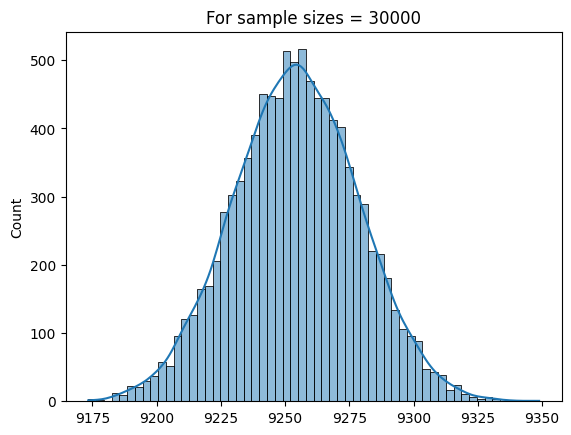

In [ ]:
sns.histplot(sample_30000, kde=True)
plt.title("For sample sizes = 30000")
plt.show()

In [ ]:
#95% confidence interval
sample_30000_mean = np.mean(sample_30000)
#Standard Error
se=np.std(sample_30000)
print("Standard deviation for Sample means of sample size 30000 is:", se)
print("95% confidence interval for sample size 30000")
print(sample_30000_mean+z1*se,sample_30000_mean+z2*se)
print("Width of CI: ",((sample_30000_mean+z2*se) - (sample_30000_mean+z1*se)))

Standard deviation for Sample means of sample size 30000 is: 24.351455205406186
95% confidence interval for sample size 30000
9206.513172519597 9301.96912286707
Width of CI:  95.45595034747384


# **Observation:**
1.	On an average Age of a customer **does not appear to have much effect** on amount of money spent by the customer at Walmart.

2.	**Confidence interval** computed using the entire dataset **wider for Age Group 36-45** than Age Group 26-35,

  Width of Age Group 26-35:  41.59101734149226

  Width of Age Group 36-45: 58.685674299984385

  This difference is because **Age Group 26-35 sample size is more** than Age Group 36-45 thus the calculated Confidence Interval is **more precise**. Standard Error is inversely proportional to square root of sample size.

  Age Group 26-35 Purchase data sample size:    218661

  Age Group 36-45 Purchase data sample size:  109409


3.	As the **Sample Size increases the width of Confidence Interval decreases** indicating we are able to predict the range between which the mean of population will lie with more precision.

  **For Age Group 26-35:**

  Width of CI for sample size 300:    1124.554605881991

  Width of CI for sample size 3000:   347.15035802137936

  Width of CI for sample size 30000:  102.72650408876507

  **For Age Group 36-45:**

  Width of CI for sample size 300:    1116.4668279756115

  Width of CI for sample size 3000:   345.23001217301135

  Width of CI for sample size 30000:  95.45595034747384

4.	**Confidence intervals (CI)** for different sample sizes **does overlap** with each other. With increasing sample size, the spread of CI become narrower. It is like CI of higher sample size lies within the CI of smaller sample size making the prediction of actual population mean more precise.

  **For Age Group 26-35:**

  CI for sample size 300:     (8638.519345059003, 9763.073950940994)

  CI for sample size 3000:   (9019.291090989313, 9366.441449010692)

  CI for sample size 30000:  (9141.84311242895, 9244.569616517714)

  **For Age Group 36-45:**

  CI for sample size 300:     (8696.159785678861, 9812.626613654473)

  CI for sample size 3000:   (9082.526686713492, 9427.756698886504)

  CI for sample size 30000:  (9206.513172519597, 9301.96912286707)

5.	With **increasing sample size**, the **shape of the distributions** of the means becomes **narrower** i.e. its **spread reduces**. This reduction in spread is captured by the reduction in distribution's standard deviation.

  **For Age Group 26-35:**

  Standard deviation for Sample means of sample size 300 is: 286.8814464837962

  Standard deviation for Sample means of sample size 3000 is: 88.56039211935956

  Standard deviation for Sample means of sample size 30000 is: 26.206222384456257

  **For Age Group 36-45:**

  Standard deviation for Sample means of sample size 300 is: 284.8181999215697

  Standard deviation for Sample means of sample size 3000 is: 88.07049897246627

  Standard deviation for Sample means of sample size 30000 is: 24.351455205406186


# **Confidence Interval calculation of remaing Age group using bootstrapping.**

## **For Age Group 0-17**

In [ ]:
# 95% confidence intervals value of z1 and z2
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
z1,z2

(-1.9599639845400545, 1.959963984540054)

In [ ]:
#Population
age_0_17_purchase=df[df["Age"]=="0-17"]["Purchase"]

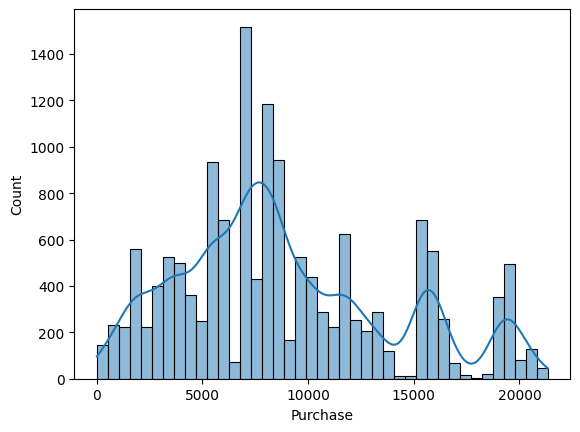

In [ ]:
#Population distribution
sns.histplot(age_0_17_purchase,kde=True)
plt.show()

In [ ]:
#population parameters
mu= age_0_17_purchase.mean()
print("Population mean: ",mu)
sigma = age_0_17_purchase.std()
print("Population standard deviation: ",sigma)

Population mean:  8867.447046301224
Population standard deviation:  5030.052845920101


In [ ]:
#Finding 95% Confidence Interval of entire data using Bootstrapping
n=len(age_0_17_purchase)
bootstrapped_means = [np.mean(np.random.choice(age_0_17_purchase,size=n)) for i in range(10000)]

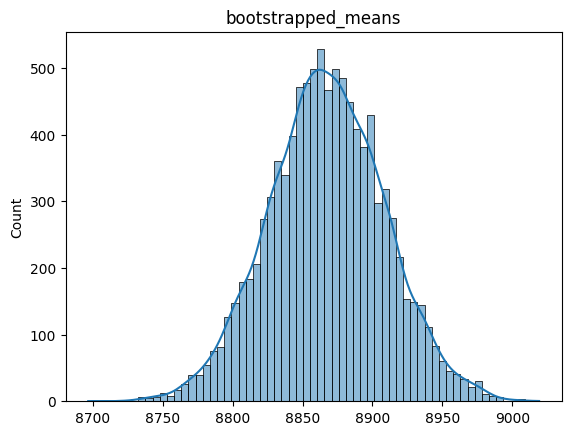

In [ ]:
sns.histplot(bootstrapped_means, kde=True)
plt.title("bootstrapped_means")
plt.show()

In [ ]:
#95% confidence interval
mean_of_bootstrapped_means = np.mean(bootstrapped_means)
#Standard Error
se=np.std(bootstrapped_means)
print("Standard deviation for bootstrapped_means is:", se)
print("95% confidence interval for bootstrapped_means")
print(mean_of_bootstrapped_means+z1*se,mean_of_bootstrapped_means+z2*se)
print("Width of CI: ",((mean_of_bootstrapped_means+z2*se) - (mean_of_bootstrapped_means+z1*se)))

Standard deviation for bootstrapped_means is: 41.32043870722686
95% confidence interval for bootstrapped_means
8786.365416699873 8948.338560082992
Width of CI:  161.97314338311844


## **For Age Group 18-25**

In [ ]:
# 95% confidence intervals value of z1 and z2
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
z1,z2

(-1.9599639845400545, 1.959963984540054)

In [ ]:
#Population
age_18_25_purchase=df[df["Age"]=="18-25"]["Purchase"]

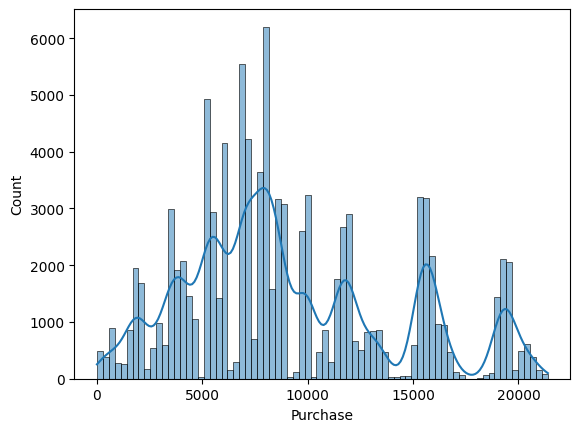

In [ ]:
#Population distribution
sns.histplot(age_18_25_purchase,kde=True)
plt.show()

In [ ]:
#population parameters
mu= age_18_25_purchase.mean()
print("Population mean: ",mu)
sigma = age_18_25_purchase.std()
print("Population standard deviation: ",sigma)

Population mean:  9124.031731330662
Population standard deviation:  4978.831061893425


In [ ]:
#Finding 95% Confidence Interval of entire data using Bootstrapping
n=len(age_18_25_purchase)
bootstrapped_means = [np.mean(np.random.choice(age_18_25_purchase,size=n)) for i in range(10000)]

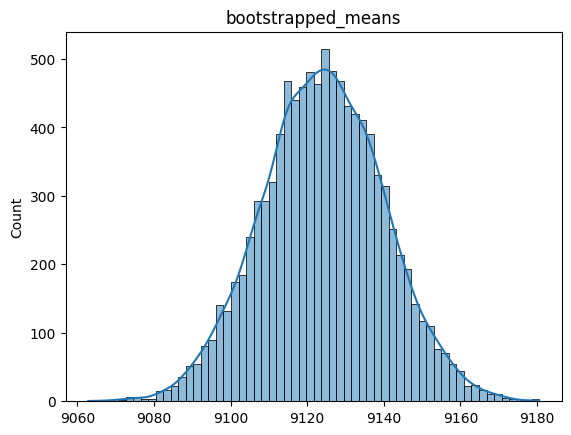

In [ ]:
sns.histplot(bootstrapped_means, kde=True)
plt.title("bootstrapped_means")
plt.show()

In [ ]:
#95% confidence interval
mean_of_bootstrapped_means = np.mean(bootstrapped_means)
#Standard Error
se=np.std(bootstrapped_means)
print("Standard deviation for bootstrapped_means is:", se)
print("95% confidence interval for bootstrapped_means")
print(mean_of_bootstrapped_means+z1*se,mean_of_bootstrapped_means+z2*se)
print("Width of CI: ",((mean_of_bootstrapped_means+z2*se) - (mean_of_bootstrapped_means+z1*se)))

Standard deviation for bootstrapped_means is: 15.861225628589615
95% confidence interval for bootstrapped_means
9093.02441033548 9155.199272300879
Width of CI:  62.17486196539903


## **For Age Group 46-50**

In [ ]:
# 95% confidence intervals value of z1 and z2
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
z1,z2

(-1.9599639845400545, 1.959963984540054)

In [ ]:
#Population
age_46_50_purchase=df[df["Age"]=="46-50"]["Purchase"]

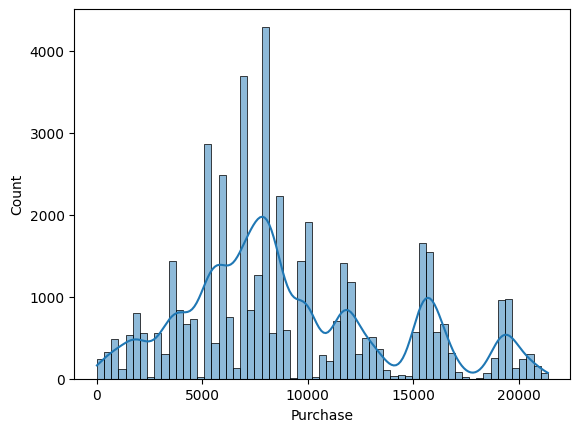

In [ ]:
#Population distribution
sns.histplot(age_46_50_purchase,kde=True)
plt.show()

In [ ]:
#population parameters
mu= age_46_50_purchase.mean()
print("Population mean: ",mu)
sigma = age_46_50_purchase.std()
print("Population standard deviation: ",sigma)

Population mean:  9128.985079882048
Population standard deviation:  4867.4139511600915


In [ ]:
#Finding 95% Confidence Interval of entire data using Bootstrapping
n=len(age_46_50_purchase)
bootstrapped_means = [np.mean(np.random.choice(age_46_50_purchase,size=n)) for i in range(10000)]

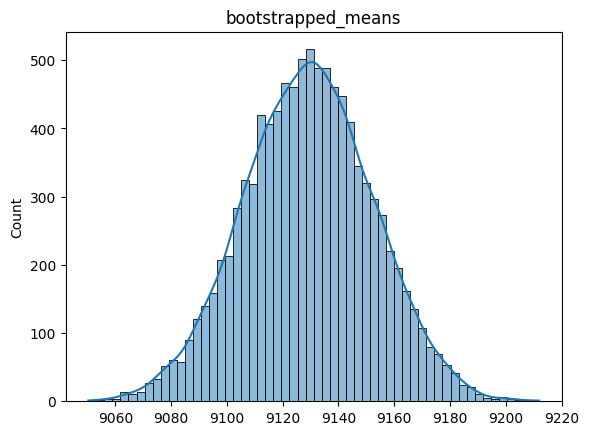

In [ ]:
sns.histplot(bootstrapped_means, kde=True)
plt.title("bootstrapped_means")
plt.show()

In [ ]:
#95% confidence interval
mean_of_bootstrapped_means = np.mean(bootstrapped_means)
#Standard Error
se=np.std(bootstrapped_means)
print("Standard deviation for bootstrapped_means is:", se)
print("95% confidence interval for bootstrapped_means")
print(mean_of_bootstrapped_means+z1*se,mean_of_bootstrapped_means+z2*se)
print("Width of CI: ",((mean_of_bootstrapped_means+z2*se) - (mean_of_bootstrapped_means+z1*se)))

Standard deviation for bootstrapped_means is: 23.029198296293544
95% confidence interval for bootstrapped_means
9084.030034719412 9174.302833226544
Width of CI:  90.27279850713239


## **For Age Group 51-55**

In [ ]:
# 95% confidence intervals value of z1 and z2
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
z1,z2

(-1.9599639845400545, 1.959963984540054)

In [ ]:
#Population
age_51_55_purchase=df[df["Age"]=="51-55"]["Purchase"]

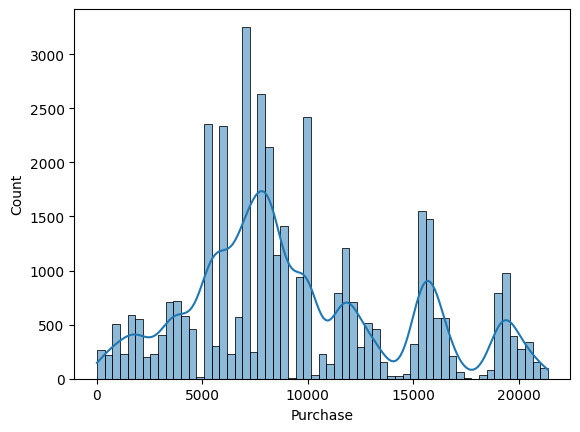

In [ ]:
#Population distribution
sns.histplot(age_51_55_purchase,kde=True)
plt.show()

In [ ]:
#population parameters
mu= age_51_55_purchase.mean()
print("Population mean: ",mu)
sigma = age_51_55_purchase.std()
print("Population standard deviation: ",sigma)

Population mean:  9423.121704066403
Population standard deviation:  4953.644649867353


In [ ]:
#Finding 95% Confidence Interval of entire data using Bootstrapping
n=len(age_51_55_purchase)
bootstrapped_means = [np.mean(np.random.choice(age_51_55_purchase,size=n)) for i in range(10000)]

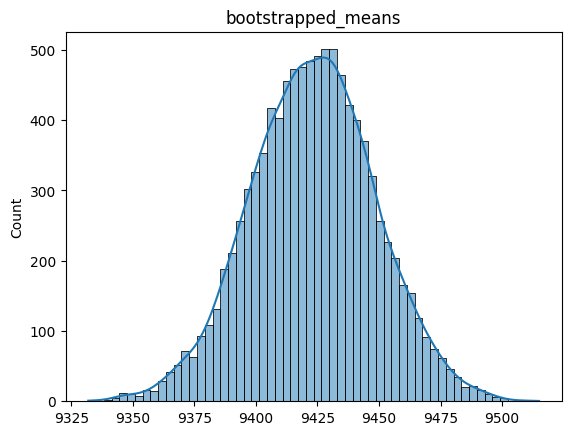

In [ ]:
sns.histplot(bootstrapped_means, kde=True)
plt.title("bootstrapped_means")
plt.show()

In [ ]:
#95% confidence interval
mean_of_bootstrapped_means = np.mean(bootstrapped_means)
#Standard Error
se=np.std(bootstrapped_means)
print("Standard deviation for bootstrapped_means is:", se)
print("95% confidence interval for bootstrapped_means")
print(mean_of_bootstrapped_means+z1*se,mean_of_bootstrapped_means+z2*se)
print("Width of CI: ",((mean_of_bootstrapped_means+z2*se) - (mean_of_bootstrapped_means+z1*se)))

Standard deviation for bootstrapped_means is: 25.28607178843614
95% confidence interval for bootstrapped_means
9373.576029211214 9472.695609242874
Width of CI:  99.11958003166


## **For Age Group 55+**

In [ ]:
# 95% confidence intervals value of z1 and z2
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
z1,z2

(-1.9599639845400545, 1.959963984540054)

In [ ]:
#Population
age_55_plus_purchase=df[df["Age"]=="55+"]["Purchase"]

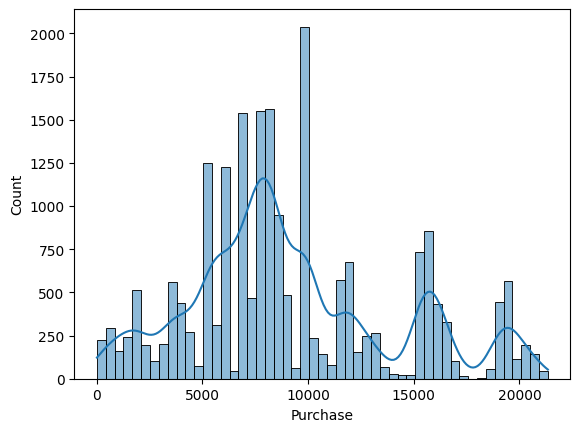

In [ ]:
#Population distribution
sns.histplot(age_55_plus_purchase,kde=True)
plt.show()

In [ ]:
#population parameters
mu= age_55_plus_purchase.mean()
print("Population mean: ",mu)
sigma = age_55_plus_purchase.std()
print("Population standard deviation: ",sigma)

Population mean:  9216.650220429603
Population standard deviation:  4861.62659605644


In [ ]:
#Finding 95% Confidence Interval of entire data using Bootstrapping
n=len(age_55_plus_purchase)
bootstrapped_means = [np.mean(np.random.choice(age_55_plus_purchase,size=n)) for i in range(10000)]

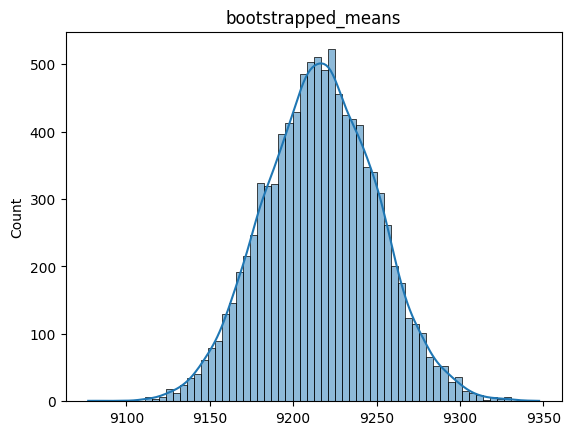

In [ ]:
sns.histplot(bootstrapped_means, kde=True)
plt.title("bootstrapped_means")
plt.show()

In [ ]:
#95% confidence interval
mean_of_bootstrapped_means = np.mean(bootstrapped_means)
#Standard Error
se=np.std(bootstrapped_means)
print("Standard deviation for bootstrapped_means is:", se)
print("95% confidence interval for bootstrapped_means")
print(mean_of_bootstrapped_means+z1*se,mean_of_bootstrapped_means+z2*se)
print("Width of CI: ",((mean_of_bootstrapped_means+z2*se) - (mean_of_bootstrapped_means+z1*se)))

Standard deviation for bootstrapped_means is: 33.6789724717712
95% confidence interval for bootstrapped_means
9150.420065695862 9282.439211857838
Width of CI:  132.0191461619761


# **7. Report on analysis done using "Central Limit Theorem (CLT)"**

### **1.	Effect of Gender on the amount spent:**
Confidence intervals for the average amount spent by males and females (computed using all the data) **does not overlap**.

    CI for Female: (8646.17888165136 8696.46135745232)

    CI for Male: (9352.22366078461 9383.087680625631)

This clearly shows that **average spending of male is more** than female in Walmart.
The Walmart should take steps to **retain its male customers** diversifying its Male centric products or creating male exclusive sections at Walmart.
Further Walmart should bring some **offers for Female customers** to encourage them to make higher purchase. Such offers will also add **new female customers** thus increasing the overall sales.

### **2.	Effect of Marital Status on the amount spent:**
Confidence intervals for the average amount spent by married and unmarried (computed using all the data) customers **overlap**.

    CI for Unmarried: (9184.552634167298 9218.445030178917)

    CI for Married: (9166.512974407407 9207.238135145613)

The overlapping shows that purchase behavior of customers is **not much affected by their Marital Status**. So, Walmart may not gain much by profiling customers based on marital status.

### **3.	Effect of Age  on the amount spent:**
Confidence intervals for the average amount spent by **some** of age groups (computed using all the data) **overlap** and for **some** Confidence interval **does not overlap**.

    CI for 0-17: (8786.365416699873 8948.338560082992)

    CI for 18-25: (9093.02441033548 9155.199272300879)

    CI for 26-35: (9172.840333295584 9214.431350637076)

    CI for 36-45: (9224.921260431558 9283.606934731542)

    CI for 46-50: (9084.030034719412 9174.302833226544)

    CI for 51-55: (9373.576029211214 9472.695609242874)

    CI for 55+: (9150.420065695862 9282.439211857838)

For age group **0-17** average amount spent is comparatively **low**. Walmart can introduce some offers for children to boost the amount spent for this specific group.

Customer of age group **51-55** have the **highest average purchase** amount in all age groups. Increasing the number of customers falling in this age group will increase the overall sales per customers.


# **8. Recommendations:**

1.	**71.7%** of Walmart customers are **Male** and they also on an average **spend higher** amount in Walmart. Walmart should take steps to **retain** its male customers by **diversifying** its Male centric products or creating male **exclusive sections** at Walmart. It can c**onduct survey** among male customers regarding product they would like to see at Walmart as well as take feedback regarding their current experience at Walmart.

2.	Just **28.3%** Walmart customers are **Female** and they also tend to **spend less** compared to Male customers. Walmart should bring some attractive **discounts and offers** for Female customers to encourage them to make higher purchase. This will also **attract new female customers** and will improve the overall customer base and sales in future.

3.	**Marital Status** of a customer **does not** have much impact on the purchase behavior. Therefore, Walmart **should not** do customer **segmentation** or **profiling** solely based on marital status.

4.	For **age group 0-17** average amount spent is comparatively low also the customers falling in this category is just **3.7%**. Walmart should introduce some **offers for children and teenagers** to boost the amount spent for 0-17 age group. Also steps like **adding new popular product and advertisement** should be undertaken to add new customers in this age group. The products which generally cater the needs of children and teenager like food items, toys, games and electronic gadgets are items for which **buying frequency** per customer is generally **high**. This will create a sustainable increase in overall sales.

5.	Customer of **age group 51-55** have the **highest average purchase** amount among all other groups but only comprise of **8.2%** of overall customer base. Increasing the number of customers falling in this age group will increase the overall sales per customer for Walmart. This age group of **mature people** who are generally clear about their need and requirement. So, **Survey** should be conducted among persons of this age group for understanding their **needs and requirements**. Those suggestions should be **incorporated and advertise** to attract more persons of this age group.

6.	Walmart is very **popular** among young customers of **age group 26-35** and a **major share of revenue** comes from these customers. Thus, it is very important for Walmart to **retain** these customers. **Regular feedback** should be taken to ensure that Walmart is serving its prime customer group well so that they continue to remain happy with their purchase.

7.	Customers belonging to **0,4 and 7 occupation group** are likely to **prefer Walmart**. So future advertisement **targeting** customers with these occupational group are more likely to yield positive result.

8.	Walmart has low customer number form **A and B cities**. Customers from **B city** although less in number than City C contribute more to the total **revenue** of Walmart. Walmar may plan to **open new stores** in such cities A and B to increase its customer base and overall sales.

9.	**Product category 1,5 and 8** generate **most revenue** for Walmart. Regular **customer feedback** should be taken for sales in these product categories to maintain high sales rate and revenue generation.

10.	**Product category 5 and 8** appears to be **popular** among **Female customers**. Diversifying product in these product categories can help increase sales from female customers and also attract new female customers.
